In [1]:
%load_ext Cython

In [2]:
%%cython
from draculab import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from numpy import sin, cos
%matplotlib notebook
import time

In [4]:
## SETTING THE NETWORK ##

class spinal_cord():
    
    def antagonist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1,
                          alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the antagonist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def antagonist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                               alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)

    def synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                         alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = exc_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = exc_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                              alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)
    
    def partial_synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                                 alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the partial synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Selective afferent synapse dictionary
        sel_aff_syn = {'init_w' : {'distribution':'uniform', 'low':-2, 'high':2},
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle1_2_ib_muscle2_syn_spec = sel_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle2_2_ib_muscle1_syn_spec = sel_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_ib_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_ib_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def partial_synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                                      alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.connect(alpha_muscle1, r_muscle2, self.alpha_muscle1_2_r_muscle2_conn_spec, 
                         self.alpha_muscle1_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle2, self.r_muscle1_2_alpha_muscle2_conn_spec, 
                         self.r_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, ib_muscle2, self.ib_muscle1_2_ib_muscle2_conn_spec, 
                         self.ib_muscle1_2_ib_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.connect(alpha_muscle2, r_muscle1, self.alpha_muscle2_2_r_muscle1_conn_spec, 
                         self.alpha_muscle2_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle1, self.r_muscle2_2_alpha_muscle1_conn_spec, 
                         self.r_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, ib_muscle1, self.ib_muscle2_2_ib_muscle1_conn_spec, 
                         self.ib_muscle2_2_ib_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)
    
    def __init__(self):
        
    ########### Fixing random seed
    
        self.seed = 19680801
        np.random.seed(self.seed)
        
    ########### Create parameter dictionaries for network, plant, and units
    
        # Defining network parameters
        self.net_params = {'min_delay': 0.005,
                           'min_buff_size': 10}

        # Defining neurons' parameters
        
        # Neurons' dictionary
        neuron_params = {'type' : unit_types.presyn_inh_sig,
                         'init_val' : 0.,
                         'thresh' : .5,
                         'slope' : 11.,
                         'tau' : 0.02,
                         'HYP' : 2.,
                         'OD' : 2.}
        ia_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        alpha_params = {'type' : unit_types.presyn_inh_sig,
                        'init_val' : 0.,
                        'thresh' : 0.8,
                        'slope' : 5.,
                        'tau' : 0.02,
                        'HYP' : 2.,
                        'OD' : 2.}
        ib_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 2.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        pn_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        
        
        # Muscle 1 neurons
        self.alpha_1_params = alpha_params
        self.pn_1_params = pn_params
        self.ia_1_params = ia_params
        self.r_1_params = neuron_params
        self.ib_1_params = ib_params
        
        # Muscle 2 neurons
        self.alpha_2_params = alpha_params
        self.pn_2_params = pn_params
        self.ia_2_params = ia_params
        self.r_2_params = neuron_params
        self.ib_2_params = ib_params
        
        # Muscle 3 neurons
        self.alpha_3_params = alpha_params
        self.pn_3_params = pn_params
        self.ia_3_params = ia_params
        self.r_3_params = neuron_params
        self.ib_3_params = ib_params
        
        # Muscle 4 neurons
        self.alpha_4_params = alpha_params
        self.pn_4_params = pn_params
        self.ia_4_params = ia_params
        self.r_4_params = neuron_params
        self.ib_4_params = ib_params
        
        # Muscle 5 neurons
        self.alpha_5_params = alpha_params
        self.pn_5_params = pn_params
        self.ia_5_params = ia_params
        self.r_5_params = neuron_params
        self.ib_5_params = ib_params
        
        # Muscle 6 neurons
        self.alpha_6_params = alpha_params
        self.pn_6_params = pn_params
        self.ia_6_params = ia_params
        self.r_6_params = neuron_params
        self.ib_6_params = ib_params

        # Defining arm parameters
        self.arm_params = {'type': plant_models.planar_arm_v3,
                           'mass1': 1.,
                           'mass2': 1.,
                           'init_q1': 0.,
                           'init_q2': np.pi/2.,
                           'init_q1p': 0.,
                           'init_q2p': 0.,
                           'g': 0.0,
                           'mu1': 0.01,
                           'mu2': 0.01,
                           
                           #'s_min' : -0.4,
                           #'p1' : (-0.01, 0.04),
                           #'p2' : (0.29, 0.03),
                           #'p3' : (0., 0.05),
                           #'p5' : (0.01, -0.05),
                           #'p10': (0.29, 0.03),
                           #'l_torque' : 0.01,
                           #'l_visco' : 0.01,
                           'g_e' : 20.,
                           #'l0_e' : [1.]*6,
                           #'Ia_gain' : 2.5*np.array([3.,10.,10., 3.,10.,10.]),
                           #'II_gain' : 2.*np.array([3., 8., 8., 3., 8., 8.]),
                           #'Ib_gain' : 5.,
                           #'T_0' : .5,
                           'k_pe_e' : 8,
                           'k_se_e' : 13,
                           #'b_e' : 5.,
                           #'g_s' : 0.02,
                           #'k_pe_s' : 2., 
                           #'k_se_s' : 2.,
                           #'g_d' : 0.01,
                           #'k_pe_d' : .2, #.1,
                           #'k_se_d' : 1., #2.,
                           #'b_s' : .5,
                           #'b_d' : 2.,#3.,
                           #'l0_s': .7,
                           #'l0_d': .8,
                           #'fs' : 0.1,
                           #'se_II' : 0.5,
                           #'cd' : 0.5,
                           #'cs' : 0.5
                           
                           }
        
        # Defining sources' parameters
        self.source_params = {'init_val' : 1.,
                              'type' : unit_types.source,
                              'function' : lambda x: 1.}
        
    ########### Create parameter dictionaries for the synapses and connections
    
        '''    
        # Defining synapses' and connections' specifications to neurons and plant
        
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(0, 5, 6, 7, 9, 17, 18, 19)
        # Muscle 2 - muscle 3
        self.antagonist_params(3, 9, 10, 11, 6, 13, 14, 15)
        # Muscle 5 - muscle 6
        self.antagonist_params(12, 21, 22, 23, 15, 25, 26, 27)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(0, 5, 6, 7, 3, 9, 10, 11)
        # Muscle 1 - muscle 5
        self.synergist_params(0, 5, 6, 7, 12, 21, 22, 23)
        # Muscle 4 - muscle 3
        self.synergist_params(9, 17, 18, 19, 6, 13, 14, 15)
        # Muscle 4 - muscle 6
        self.synergist_params(9, 17, 18, 19, 15, 25, 26, 27)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(3, 9, 10, 11, 12, 21, 22, 23)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(3, 9, 10, 11, 15, 25, 26, 27)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(6, 13, 14, 15, 12, 21, 22, 23)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(6, 13, 14, 15, 15, 25, 26, 27)
        '''
        
        # Defining synapses' specifications to source units

        # PC synapse dictionary
        self.pc_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [1]}
        # IC synapse dictionary
        self.ic_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [2, 2, 2, 2]}   
        
        # Defining connections' specifications to source units

        # PC Connection dictionary
        self.pc_conn_spec = {'rule' : 'one_to_one',
                             'delay' : 0.005}
        # IC connection dictionary 
        self.ic_conn_spec = {'rule' : 'all_to_all',
                             'delay' : 0.005}
        
    def initialize(self):
        
        np.random.seed(self.seed)
        
    ########### Create network, neurons and plant

        self.net = network(self.net_params)
        
        alpha_1 = self.net.create(1, self.alpha_1_params)
        pn_1 = self.net.create(1, self.pn_1_params)
        ia_1 = self.net.create(1, self.ia_1_params)
        r_1 = self.net.create(1, self.r_1_params)
        ib_1 = self.net.create(1, self.ib_1_params)
        self.m1_ids = alpha_1 + pn_1 + ia_1 + r_1 + ib_1
        
        alpha_2 = self.net.create(1, self.alpha_2_params)
        pn_2 = self.net.create(1, self.pn_2_params)
        ia_2 = self.net.create(1, self.ia_2_params)
        r_2 = self.net.create(1, self.r_2_params)
        ib_2 = self.net.create(1, self.ib_2_params)
        self.m2_ids = alpha_2 + pn_2 + ia_2 + r_2 + ib_2
        
        alpha_3 = self.net.create(1, self.alpha_3_params)
        pn_3 = self.net.create(1, self.pn_3_params)
        ia_3 = self.net.create(1, self.ia_3_params)
        r_3 = self.net.create(1, self.r_3_params)
        ib_3 = self.net.create(1, self.ib_3_params)
        self.m3_ids = alpha_3 + pn_3 + ia_3 + r_3 + ib_3
        
        alpha_4 = self.net.create(1, self.alpha_4_params)
        pn_4 = self.net.create(1, self.pn_4_params)
        ia_4 = self.net.create(1, self.ia_4_params)
        r_4 = self.net.create(1, self.r_4_params)
        ib_4 = self.net.create(1, self.ib_4_params)
        self.m4_ids = alpha_4 + pn_4 + ia_4 + r_4 + ib_4
        
        alpha_5 = self.net.create(1, self.alpha_5_params)
        pn_5 = self.net.create(1, self.pn_5_params)
        ia_5 = self.net.create(1, self.ia_5_params)
        r_5 = self.net.create(1, self.r_5_params)
        ib_5 = self.net.create(1, self.ib_5_params)
        self.m5_ids = alpha_5 + pn_5 + ia_5 + r_5 + ib_5
        
        alpha_6 = self.net.create(1, self.alpha_6_params)
        pn_6 = self.net.create(1, self.pn_6_params)
        ia_6 = self.net.create(1, self.ia_6_params)
        r_6 = self.net.create(1, self.r_6_params)
        ib_6 = self.net.create(1, self.ib_6_params)
        self.m6_ids = alpha_6 + pn_6 + ia_6 + r_6 + ib_6
        
        self.arm = self.net.create(1, self.arm_params)

    ########### Connect
    
        #Creating lists with port numbers
        alpha_port = range(0,6)
        ia_port = range(28,34)
        ii_port = range(34,40)
        ib_port = range(22,28)
    
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[3], ia_port[3], 
                               ii_port[3], ib_port[3])
        #self.antagonist_params(0, 28, 34, 22, 3, 31, 37, 25)
        self.antagonist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_4, ia_4, ib_4, pn_4, r_4)
        # Muscle 2 - muscle 3
        self.antagonist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.antagonist_params(1, 29, 35, 23, 2, 30, 36, 24)
        self.antagonist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 5 - muscle 6
        self.antagonist_params(alpha_port[4], ia_port[4], ii_port[4], ib_port[4], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.antagonist_params(4, 32, 38, 26, 5, 33, 39, 27)
        self.antagonist_connections(alpha_5, ia_5, ib_5, pn_5, r_5, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[1], ia_port[1], 
                               ii_port[1], ib_port[1])
        #self.synergist_params(0, 28, 34, 22, 1, 29, 35, 23)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_2, ia_2, ib_2, pn_2, r_2)
        # Muscle 1 - muscle 5
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.synergist_params(0, 28, 34, 22, 4, 32, 38, 26)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 4 - muscle 3
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.synergist_params(3, 31, 37, 25, 2, 30, 36, 24)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 4 - muscle 6
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.synergist_params(3, 31, 37, 25, 5, 33, 39, 27)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(1, 29, 35, 23, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(1, 29, 35, 23, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_6, ia_6, ib_6, pn_6, r_6)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(2, 30, 36, 24, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(2, 30, 36, 24, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_6, ia_6, ib_6, pn_6, r_6)
    
    ########### Create PC source units and connect
    
        for unit in self.net.units:
            uid = unit.ID
            for syn in range(len(self.net.syns[uid])):
                src = self.net.create(1, self.source_params)
                self.net.connect(src, [uid], self.pc_conn_spec, self.pc_syn)
                
    ########### Create IC source unit and connect

        self.ic_source = self.net.create(1, self.source_params)
        self.net.connect(self.ic_source, self.m1_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m2_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m3_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m4_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m5_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m6_ids[1:], self.ic_conn_spec, self.ic_syn)
        
    ########### Create source units to track the insertion points and tensions of the arm muscles
    
        track_params = {'type': unit_types.source,
                        'init_val': 0.,
                        'function' : lambda x: 0.}
        
        # create source units to track the insertion points
        self.ipx_track = self.net.create(12, track_params) # x coordinates
        self.ipy_track = self.net.create(12, track_params) # y coordinates
        # create source units to track the tensions
        #self.ten_track = self.net.create(6, track_params)

        for idx, uid in enumerate(self.ipx_track):
            self.net.units[uid].set_function(self.create_xtracker(self.arm, idx))
        for idx, uid in enumerate(self.ipy_track):
            self.net.units[uid].set_function(self.create_ytracker(self.arm, idx))
        #for idx, uid in enumerate(self.ten_track):
            #self.net.units[uid].set_function(self.create_tentracker(self.arm, idx))
            
    def create_xtracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][0]

    def create_ytracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][1]

    #def create_tentracker(self, arm_id, idx):
        #return lambda t: self.net.plants[arm_id].muscles[idx].T
        
    def simulate(self, sim_time, flat=True):
    ########### Simulate
    
        if flat:
            self.sim_dat = self.net.flat_run(sim_time)
        else:
            self.sim_dat = self.net.run(sim_time)
        self.arm_activs = np.array(self.sim_dat[2][self.arm])
        
        #print(self.sim_dat[1][self.alpha_1[0]])
        #print(self.arm_activs[:,0])
        #print(len(self.net.syns[self.ib_4[0]]))
        
    def neuron_activity(self):    
    # Plot of neurons' activity

        fig = plt.figure(figsize=(18,8))
        fig.add_subplot(231)
        m_label = ["alpha", "PN", "Ia", "R", "Ib"]
        m1_label = [s + " m1" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m1_ids[i]])
        plt.legend(m1_label, loc="lower right", ncol=1)
        fig.add_subplot(232)
        m2_label = [s + " m2" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m2_ids[i]])
        plt.legend(m2_label, loc="lower right", ncol=1)
        fig.add_subplot(233)
        m3_label = [s + " m3" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m3_ids[i]])
        plt.legend(m3_label, loc="lower right", ncol=1)
        fig.add_subplot(234)
        m4_label = [s + " m4" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m4_ids[i]])
        plt.legend(m4_label, loc="lower right", ncol=1)
        fig.add_subplot(235)
        m5_label = [s + " m5" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m5_ids[i]])
        plt.legend(m5_label, loc="lower right", ncol=1)
        fig.add_subplot(236)
        m6_label = [s + " m6" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m6_ids[i]])
        plt.legend(m6_label, loc="lower right", ncol=1)
        plt.show()
        
    def arm_activity(self): 
    # Plot the state variables of the arm
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Shoulder angle (rad)', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], (self.arm_activs[:,0]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Shoulder ang vel [rad/s]', fontsize='xx-large')
        ax0b.plot(self.sim_dat[0], self.arm_activs[:,1], 'r', linewidth=lw)
        ax0b.tick_params(labelsize=ls)
        ax0c = fig.add_axes([0.01, .44, .99, 0.16 ])
        ax0c.set_ylabel('Elbow angle (rad)', fontsize='xx-large')
        ax0c.tick_params(labelsize=ls)
        ax0c.plot(self.sim_dat[0], (self.arm_activs[:,2]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0d = fig.add_axes([0.01, .28, .99, 0.16 ])
        ax0d.set_xlabel('time [s]', fontsize='xx-large') 
        ax0d.set_ylabel('Elbow ang vel [rad/s]', fontsize='xx-large')
        ax0d.plot(self.sim_dat[0], self.arm_activs[:,3], 'r', linewidth=lw)
        ax0d.tick_params(labelsize=ls)
        plt.show()
        
    def arm_afferent_output(self):
    # Plot the arm's afferent outputs
        fig = plt.figure(figsize=(18,17))
        fig.add_subplot(311)
        m_label = ["m1", "m2", "m3", "m4", "m5", "m6"]
        Ia_label = ["Ia afferent " + s for s in m_label]
        for i in range(28, 34):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ia_label, loc="lower right", ncol=1)
        fig.add_subplot(312)
        II_label = ["II afferent " + s for s in m_label]
        for i in range(34, 40):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(II_label, loc="lower right", ncol=1)
        fig.add_subplot(313)
        Ib_label = ["Ib afferent " + s for s in m_label]
        for i in range(22, 28):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ib_label, loc="lower right", ncol=1)
        plt.show()
        
        
    def arm_coord(self,des_coord_x,des_coord_y): 
    # Plot the hand coordinates of the arm 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], [des_coord_x]*len(self.sim_dat[0]), 'k', linewidth=1)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], [des_coord_y]*len(self.sim_dat[0]), 'k', linewidth=1)
        plt.show()
        
    def arm_trajectory(self,targ_coord_x,targ_coord_y,sim_time): 
    # Plot the hand trajectory 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        des_coord_x = []
        des_coord_y = []
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        for tid,time in enumerate(self.sim_dat[0]):   
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            des_coord_x.append(des_coord[0])
            des_coord_y.append(des_coord[1])
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], des_coord_x, 'b--', linewidth=lw)
        ax0a.set(ylim=(0, 0.5))
        ax0a.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], des_coord_y, 'r--', linewidth=lw)
        ax0b.set(ylim=(0, 0.5))
        ax0b.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        plt.show()
        
    def arm_animation(self):    
    # Animation of the arm and muscles

        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # data from tracking units
        acts = np.array(self.sim_dat[1])
        ipx = acts[self.ipx_track]
        ipy = acts[self.ipy_track]
        ten = acts[self.ten_track] # muscle tensions
        # coordinates of hand and elbow
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xe = cos(theta_s)*l1
        ye = sin(theta_s)*l1
        xh = xe + cos(phi)*l2
        yh = ye + sin(phi)*l2
        # creating the figure and axis
        fig = plt.figure(figsize=(10,10))
        plt.axis('equal')
        ax = plt.gca()
        lim = l1 + l2
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.grid()
        # creating lines and points
        line, = ax.plot([], [], 'o-b', lw=2)
        points, = ax.plot([], [], '+k')
        # preparing a colormap for the tensions
        ten_max = max(ten.max(), 1e-5)
        ten_min = min(ten.min(), -1e-5)
        for row_idx, row in enumerate(ten):
            for ent_idx, entry in enumerate(row):
                if entry > 0:
                    ten[row_idx, ent_idx] = entry/ten_max
                else:
                    ten[row_idx, ent_idx] = entry/abs(ten_min)
        ten = (ten / 2.) + 0.5
        mus_lines = []
        #cmap=plt.get_cmap('Reds')
        #cmap=plt.get_cmap('coolwarm')
        cmap=plt.get_cmap('bwr')
        for i in range(6):
            mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

        def init(self):
            line.set_data([], [])
            points.set_data([], [])
            for i in range(6):
                mus_lines = []
                mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
            return line, points, mus_lines

        def update(self, frame):
            coord_x = [0, xe[frame], xh[frame]]
            coord_y = [0, ye[frame], yh[frame]]
            ip_x = ipx[:,frame]
            ip_y = ipy[:,frame]
            tens = ten[:, frame]
            line.set_data(coord_x, coord_y)
            points.set_data(ip_x, ip_y)
            for i, ml in enumerate(mus_lines):
                idx = 2*i
                ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
                ml.set_color(cmap(tens[i]))

            cur_time = frame*0.01
            fig.suptitle('time: ' + '{:f}'.format(cur_time))
            return line, points, muls_lines #muscle1

        ani = FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                            interval=10)
        plt.show()
    
    def w_list(self):
    #Return a list with all synapse weight values in the network, separated by units
        
        w = []
        for unit in self.net.units:
            u_idx = []
            for syn in self.net.syns[unit.ID]:
                u_idx.append(syn.w)
            w.append(u_idx)
            
        return w
        
    def syn_list(self):
    #Return a list with ID's of synapses to test (at ports 1 and 2), separated by units
        
        syn_idx = []
        for unit in self.net.units:
            u_idx = []
            for i,syn in enumerate(self.net.syns[unit.ID]):
                #if syn.port in [1,2]:
                    u_idx.append(i)
            syn_idx.append(u_idx)
            
        return syn_idx
    
    def update_w(self,w):
    #Put the weights (w) in the networks' synapses
        
        #w = self.w_list()
        for uid,unit in enumerate(self.net.units):
            for sid,syn in enumerate(self.net.syns[uid]):
                syn.w = w[uid][sid]
    
    '''
    def calc_error(self,des_coord_x,des_coord_y,sim_time):
    #Calculate the error between the desired coordinate and the average of coordinates of hand in the last 
    #second of simulation
        
        avg_coord_x = 0.
        avg_coord_y = 0.
        count = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        for tid,time in enumerate(self.sim_dat[0]):
            if time > sim_time-1. :
                # angles of shoulder and elbow
                theta_s = self.arm_activs[:,0][tid]
                theta_e = self.arm_activs[:,2][tid]
                phi = theta_s + theta_e # elbow angle wrt x axis
                # coordinates of hand
                xh = cos(theta_s)*l1 + cos(phi)*l2
                yh = sin(theta_s)*l1 + sin(phi)*l2
                avg_coord_x += xh
                avg_coord_y += yh
                count += 1            
        avg_coord_x /= count
        avg_coord_y /= count
        
        return (des_coord_x - avg_coord_x)**2 + (des_coord_y - avg_coord_y)**2
    '''
    
    def targ_dist(self, time, tr, D):
        """ Target distance between hand and initial position at the given time. """
        return (time/2. - ((tr/(4*np.pi)) *
                           sin((2.*np.pi*time)/tr))) * ((2.*D)/tr)
    
    def calc_error(self,targ_coord_x,targ_coord_y,sim_time):
    #Calculate the error between the desired trajectory of the arm and the actual one
    
        error = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        #D = np.sqrt((0.3-tar_coord_x)**2 + (0.3-tar_coord_y)**2)
        #u = np.array([tar_coord_x-0.3, tar_coord_y-0.3])/D
        for tid,time in enumerate(self.sim_dat[0]):   
            # angles of shoulder and elbow
            theta_s = self.arm_activs[:,0][tid]
            theta_e = self.arm_activs[:,2][tid]
            phi = theta_s + theta_e # elbow angle wrt x axis
            # actual coordinates of hand
            xh = cos(theta_s)*l1 + cos(phi)*l2
            yh = sin(theta_s)*l1 + sin(phi)*l2
            h_coord = np.array([xh, yh])
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            
            error += ((des_coord-h_coord)*(des_coord-h_coord)).sum()
        
        return error  
        
    
    def test_weights(self,w_change):
    #Calculate error for each of 3 values of synapse weight in synapse list
    
        #start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.15
        des_coord_y = 0.45
        #w_change = 0.2
        
        w = self.w_list()
        syn_idx = self.syn_list()
        
        #RUN 1
        self.initialize()
        self.update_w(w)
        self.simulate(sim_time)
        error_1 = self.calc_error(des_coord_x,des_coord_y,sim_time)
        
    
        for uid, ulist in enumerate(w):
            print("Initial state. unit %d test syns: " % (uid),end=": ")
            print([syn.w for syn in self.net.syns[uid]])
            for syn in syn_idx[uid]:
                
                #RUN 2
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w += w_change
                self.simulate(sim_time)
                error_2 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                
                #RUN 3
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w -= w_change
                self.simulate(sim_time)
                error_3 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                self.net.syns[uid][syn].w += w_change #ruturn weight to initial value
                
                print("uid:%d, sid:%d, e1:%f, e2:%f, e3:%f" % (uid, syn, error_1, error_2, error_3))
                
                if error_2<error_1 and error_2<error_3:
                    self.net.syns[uid][syn].w += w_change
                    w[uid][syn] += w_change
                    error_1 = error_2
                elif error_3<error_1 and error_3<error_2:
                    self.net.syns[uid][syn].w -= w_change
                    w[uid][syn] -= w_change
                    error_1 = error_3
                print("change. unit %d test syns: " % (uid),end=": ")
                print([syn.w for syn in self.net.syns[uid]])
        
        #print('Execution time: %s seconds' % (time.time() - start_time))
        
        #self.initialize()
        #self.update_w(w)
        #self.simulate(sim_time)
        #print('Error: ' + str(self.calc_error(des_coord_x,des_coord_y,sim_time)))   
        #self.arm_coord(des_coord_x,des_coord_y)
        #self.arm_activity()
        
        return w 
    
    def grad_desc(self):
    #Implement the Gradient Descent Algorithm to synapses' weight
    
        start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.15
        des_coord_y = 0.45
        w_change = [1.0, 1.0, 0.5, 0.5]
        error = self.calc_error(des_coord_x,des_coord_y,sim_time)
        iterat = 0
        
        while error>0.01 and iterat<len(w_change):
            w = self.test_weights(w_change[iterat])
            del(self.net)
            self.initialize()
            self.update_w(w)
            self.simulate(sim_time)
            error = self.calc_error(des_coord_x,des_coord_y,sim_time)
            iterat += 1
            print('Iteration: ' + str(iterat))
            print('Error: ' + str(error))
            print('Execution time: %s seconds' % (time.time() - start_time))
            #self.arm_coord(des_coord_x,des_coord_y)
            #self.arm_activity()
            #self.neuron_activity()
            self.arm_trajectory(des_coord_x,des_coord_y,sim_time)
            self.arm_afferent_output()
            print(w)
            
        #print('Execution time: %s seconds' % (time.time() - start_time))    
        #print('Iterations: ' + str(iterat))
        #print('Error: ' + str(error))
        
        return w
            

Execution time: 31.964980125427246 seconds
Error: 48.29095751157706


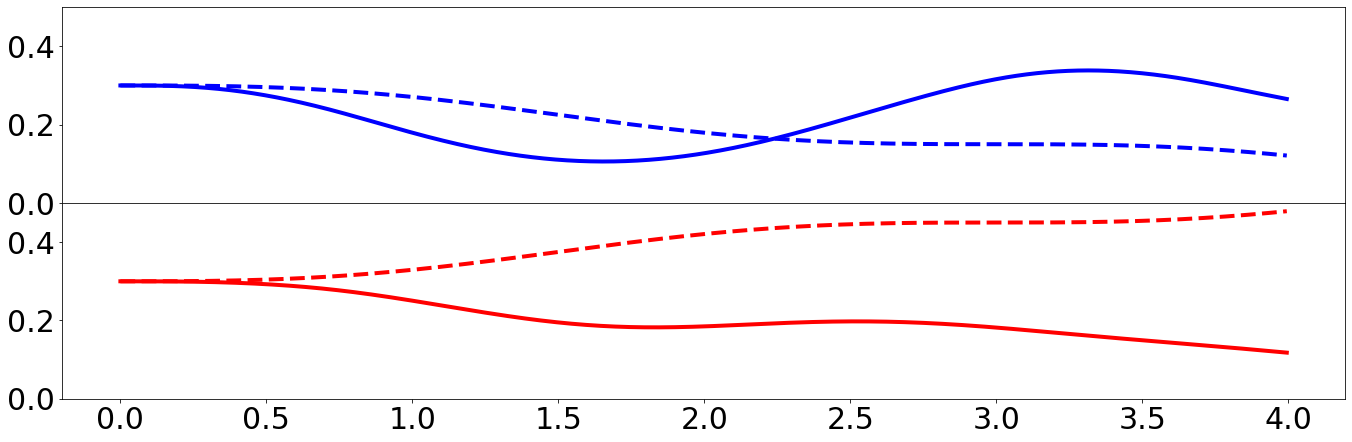

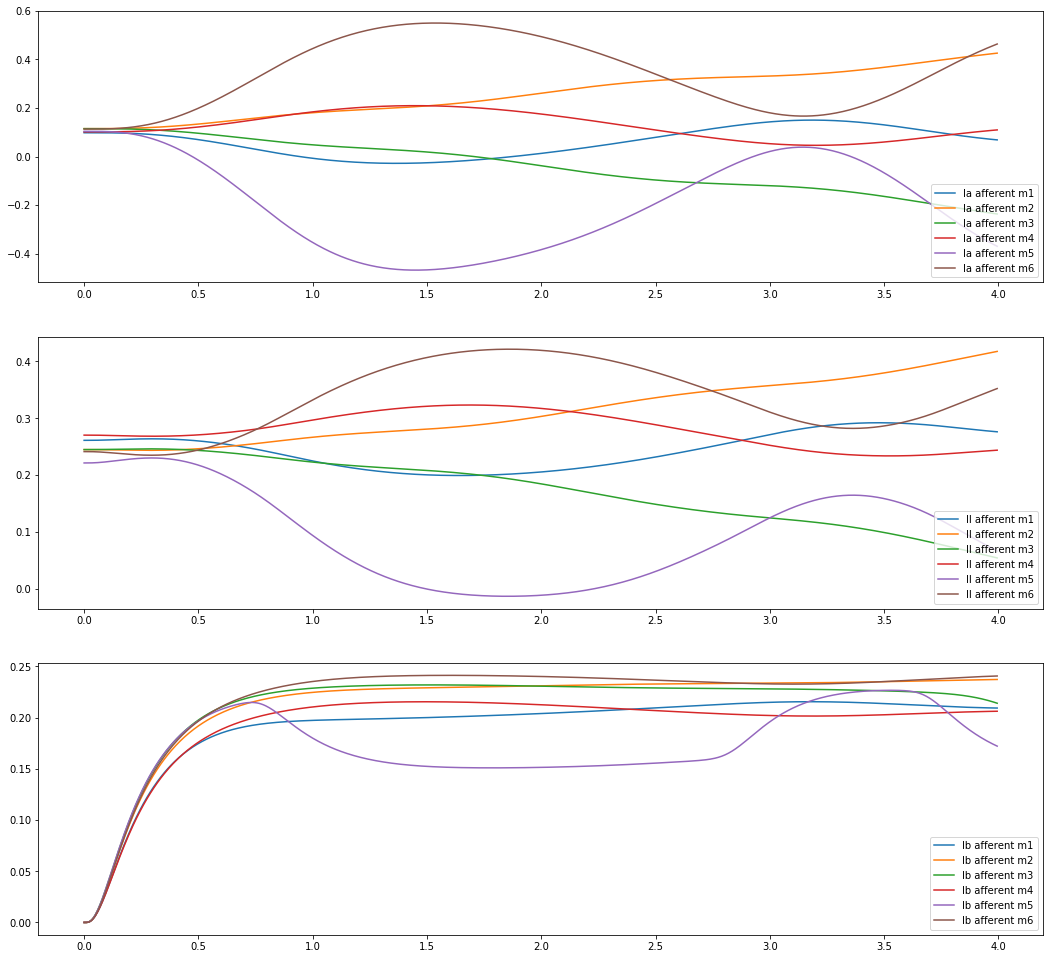

In [5]:
# Creating and runing the simulation

sc = spinal_cord()
start_time = time.time()
sc.initialize()
sc.simulate(4.)
print('Execution time: %s seconds' % (time.time() - start_time))
error = sc.calc_error(0.15,0.45,4.)
print('Error: ' + str(error))
#sc.arm_coord(0.15,0.45)
#sc.arm_activity()
#sc.neuron_activity()
sc.arm_trajectory(0.15,0.45,4.)
sc.arm_afferent_output()

In [ ]:
#Initial weights

#w = [[2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, -0.1622398916770107], [-2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.13513505471747034, -0.15255375321934372, 0.11889389670608325, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073], [2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -0.023141752983194153, 0.08921520793190307, -0.03335270022000403, -0.10927584182177, -0.018309063632626188, 0.13917750129811174, 0.04057954870249145], [2.0, 2.0, 2.0, 0.17466237958571407, 0.18241447382919224, -0.04316227373640871, 0.14310981779390508], [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.19850560781897328, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261], [-2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867], [2.0, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.14476227182019624, 0.19121155784678784, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471], [2.0, 2.0, 2.0, 0.8798266669759616, 2.0, 0.4897561346948027, 0.15166716274797148, 0.15976930476652523, -0.17380172706996203, -0.06032921390085569, -0.006484687749538504, 0.10281104693647869, -0.10260679720789488], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.015057162646764766, -0.03983207161779817, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.08046234356882379], [-2.0, -2.0, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.1386834974775626, -0.10201594754602389, -0.07223266013882143, 0.025167504354009995, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -0.08971340374189994], [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.09638962594040928], [-2.0, -2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484], [2.0, 2.0, 2.0, 0.09486501131200953, -0.009611386985856202, -0.04902458883244548, -0.08857752939243176], [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951], [-2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802], [2.0, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [2.0, 2.0, 1.911141331298305, 2.0, 0.8861789062132357, 2.0, -0.033006712817969686, 0.11816157437302743, 0.13183067666171794, -0.013810300505924078, -0.07772078096198487, 0.19046872638051077, -0.09106627291137759], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169], [-2.0, -2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [2.0, 2.0, -0.1344669629601949, 2.0, -0.4469436436793255, 2.0, -0.04782619873510843, 0.18999077344393583, -0.05598504586074804, -0.0008997390737044975, -0.03233264259643054, -0.10732439344025663, 0.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


<IPython.core.display.Javascript object>


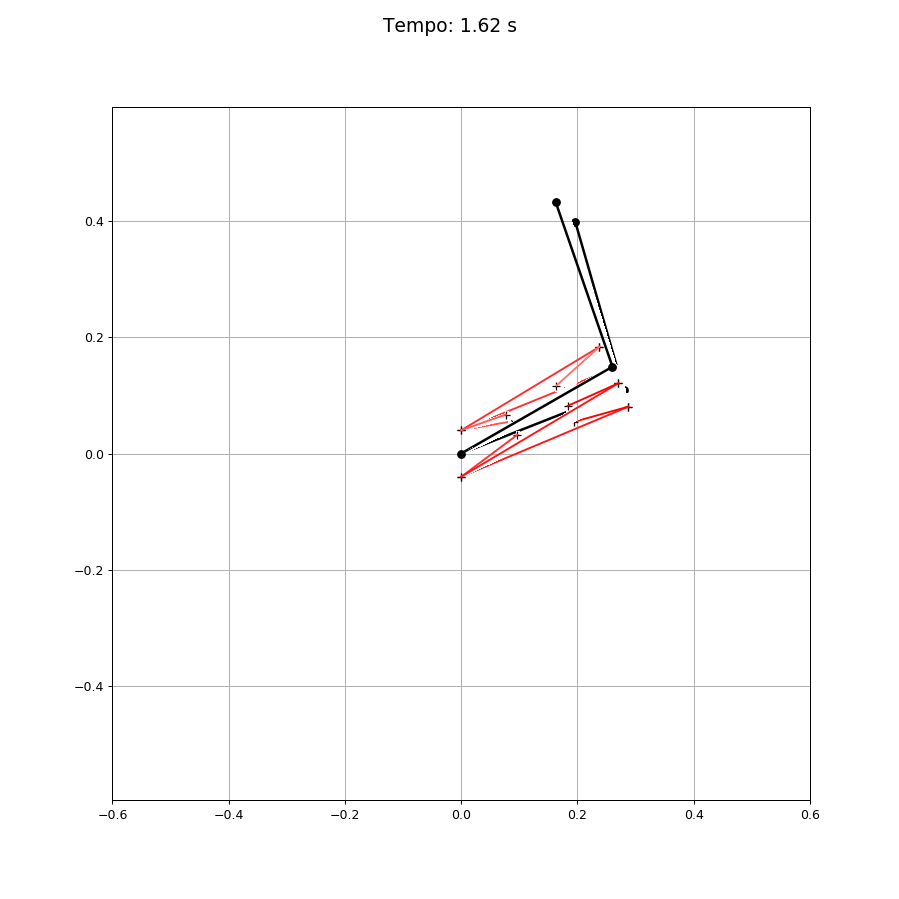

In [8]:
# Animation of the arm and muscles

%matplotlib notebook

# angles of shoulder and elbow
theta_s = sc.arm_activs[:,0]
theta_e = sc.arm_activs[:,2]
phi = theta_s + theta_e # elbow angle wrt x axis
# data from tracking units
acts = np.array(sc.sim_dat[1])
ipx = acts[sc.ipx_track]
ipy = acts[sc.ipy_track]
ten = sc.arm_activs[:,4:10] # muscle tensions
# coordinates of hand and elbow
l1 = sc.net.plants[sc.arm].l_arm
l2 = sc.net.plants[sc.arm].l_farm
xe = cos(theta_s)*l1
ye = sin(theta_s)*l1
xh = xe + cos(phi)*l2
yh = ye + sin(phi)*l2

# Set up formatting for the movie files
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# creating the figure and axis
fig = plt.figure(figsize=(10,10))
plt.axis('equal')
ax = plt.gca()
lim = l1 + l2
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.grid()
# creating lines and points
line, = ax.plot([], [], 'o-k', lw=2)
points, = ax.plot([], [], '+k')
# preparing a colormap for the tensions
ten_max = max(ten.max(), 1e-5)
ten_min = min(ten.min(), -1e-5)
for row_idx, row in enumerate(ten):
    for ent_idx, entry in enumerate(row):
        if entry > 0:
            ten[row_idx, ent_idx] = entry/ten_max
        else:
            ten[row_idx, ent_idx] = entry/abs(ten_min)
ten = (ten / 2.) + 0.5
mus_lines = []
#cmap=plt.get_cmap('Reds')
#cmap=plt.get_cmap('coolwarm')
cmap=plt.get_cmap('bwr')
for i in range(6):
    mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

def init():
    line.set_data([], [])
    points.set_data([], [])
    for i in range(6):
        mus_lines = []
        mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
    return line, points, mus_lines

def update(frame):
    coord_x = [0, xe[frame], xh[frame]]
    coord_y = [0, ye[frame], yh[frame]]
    ip_x = ipx[:,frame]
    ip_y = ipy[:,frame]
    tens = ten[frame,:]
    line.set_data(coord_x, coord_y)
    points.set_data(ip_x, ip_y)
    for i, ml in enumerate(mus_lines):
        idx = 2*i
        ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
        ml.set_color(cmap(tens[i]))

    cur_time = frame*0.005
    fig.suptitle('Tempo: ' + '{:.2f}'.format(cur_time) + ' s', fontsize=15)
    return line, points, mus_lines #muscle1

ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                              interval=10)
plt.show()
#ani.save('alvo_03_015.mp4', writer=writer)
#ani.save('alvo_03_015.gif', writer='imagemagick', fps=60)


Initial state. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:48.290958, e2:48.284946, e3:48.298592
change. unit 0 test syns: : [3.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.0974484538970151

uid:0, sid:11, e1:48.251168, e2:48.249458, e3:48.256350
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:48.249458, e2:48.249462, e3:48.249500
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145

uid:0, sid:23, e1:48.244047, e2:48.245985, e3:48.242353
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:48.242353, e2:48.242270, e3:48.254606
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.04442518840852866, 0.162521458

uid:0, sid:35, e1:48.153009, e2:48.153009, e3:48.153009
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:48.153009, e2:48.153009, e3:48.153009
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472,

uid:0, sid:47, e1:48.153009, e2:48.153009, e3:48.153009
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.1587189289562907]
Initial state. unit 1 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, -0.1622398916770107]
uid:1, sid:0, e1:48.153009, e2:48.154777, e3:48.151242
change. u

uid:2, sid:11, e1:47.932786, e2:47.922718, e3:47.980683
change. unit 2 test syns: : [-1.0, 3.0, -1.0, -1.0, 3.0, 2.0, -1.0, 3.0, 1.0, 1.1351350547174703, -0.15255375321934372, 1.1188938967060833, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073]
uid:2, sid:12, e1:47.922718, e2:47.922142, e3:47.932786
change. unit 2 test syns: : [-1.0, 3.0, -1.0, -1.0, 3.0, 2.0, -1.0, 3.0, 1.0, 1.1351350547174703, -0.15255375321934372, 1.1188938967060833, 1.1796017069915812, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073]
uid:2, sid:13, e1:47.922142, e2:47.980835, e3:47.931062
change. unit 2 test syns: : [-1.0, 3.0, -1.0, -1.0, 3.0, 2.0, -1.0, 3.0, 1.0, 1.1351350547174703, -0.15255375321934372, 1.1188938967060833, 1.1796017069915812, -0.14077484943606255, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.0393985932

uid:5, sid:0, e1:47.860765, e2:47.860765, e3:47.860765
change. unit 5 test syns: : [3.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1

uid:5, sid:8, e1:47.860211, e2:47.860211, e3:47.860211
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1

uid:5, sid:16, e1:47.858791, e2:47.858791, e3:47.858791
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:24, e1:47.858669, e2:47.858669, e3:47.883645
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:32, e1:47.858668, e2:47.858855, e3:47.858497
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:40, e1:47.836511, e2:47.836512, e3:47.836511
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090

uid:5, sid:48, e1:47.836511, e2:47.836511, e3:47.836511
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.13814126740529642, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:56, e1:47.836511, e2:47.836511, e3:47.836511
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.0865310790876459, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:64, e1:47.836511, e2:47.836511, e3:47.836511
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187

uid:6, sid:12, e1:47.769792, e2:47.778901, e3:47.777461
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025492, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:13, e1:47.769792, e2:47.778901, e3:47.777461
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:14, e1:47.769792, e2:47.778901, e3:47.777461
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.008237920533506804, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:15, e1:47.769792, e2:47.778901,

uid:7, sid:15, e1:47.702857, e2:47.734013, e3:47.709812
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 2.0, -1.0, 1.0047829728710416, -0.18286755753249107, 1.1225184615239185, -0.10312053403482357, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867]
uid:7, sid:16, e1:47.702857, e2:47.702044, e3:47.709524
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 2.0, -1.0, 1.0047829728710416, -0.18286755753249107, 1.1225184615239185, -0.10312053403482349, 1.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867]
uid:7, sid:17, e1:47.702044, e2:47.732169, e3:47.708790
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.

uid:8, sid:12, e1:47.681538, e2:47.681538, e3:47.681538
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225229, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:13, e1:47.681538, e2:47.681538, e3:47.681538
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.11891101372266188, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:14, e1:47.681538, e2:47.681538, e3:47.681538
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:15, e1:47.681538, e2:47.681538, e3:47.681538
chan

uid:10, sid:2, e1:47.601672, e2:47.602059, e3:47.601274
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:10, e1:47.523088, e2:47.522773, e3:47.523346
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:18, e1:47.280504, e2:47.414468, e3:47.203257
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:26, e1:46.551786, e2:46.551735, e3:46.551835
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310

uid:10, sid:34, e1:43.093638, e2:42.447035, e3:43.101935
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.00843101

uid:10, sid:42, e1:19.991626, e2:19.991626, e3:19.991626
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312571, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863

uid:10, sid:50, e1:19.991626, e2:19.991626, e3:19.991626
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469278, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863

uid:10, sid:58, e1:19.991626, e2:29.352151, e3:45.639991
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863

uid:10, sid:66, e1:19.991626, e2:29.352151, e3:45.639991
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863

uid:12, sid:0, e1:19.901009, e2:19.901009, e3:19.901009
change. unit 12 test syns: : [-1.0, -2.0, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:1, e1:19.901009, e2:19.901009, e3:19.901009
change. unit 12 test syns: : [-1.0, -1.0, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:2, e1:19.901009, e2:19.901009, e3:19.901010
change. unit 12 test syns: : [-1.0, -1.0, 3.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2

uid:12, sid:20, e1:19.900996, e2:19.900996, e3:19.900996
change. unit 12 test syns: : [-1.0, -1.0, 3.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:21, e1:19.900996, e2:19.900996, e3:19.900996
change. unit 12 test syns: : [-1.0, -1.0, 3.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:22, e1:19.900996, e2:19.900996, e3:19.900996
change. unit 12 test syns: : [-1.0, -1.0, 3.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1

uid:14, sid:1, e1:19.754609, e2:19.805671, e3:19.787569
change. unit 14 test syns: : [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:2, e1:19.754609, e2:19.805671, e3:19.787569
change. unit 14 test syns: : [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:3, e1:19.754609, e2:19.882029, e3:19.760918
change. unit 14 test syns: : [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:4, e1:19.754609, e2:19.805671, e3:19.787569
change. unit 14 test syns: : [2.0, 2.0, 2

uid:15, sid:6, e1:19.754463, e2:19.754460, e3:19.754477
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:7, e1:19.754460, e2:19.754459, e3:19.754460
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114

uid:15, sid:18, e1:19.754287, e2:19.754368, e3:19.754220
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:19, e1:19.754220, e2:19.754220, e3:19.754220
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.14620721

uid:15, sid:30, e1:19.752273, e2:19.752273, e3:19.752273
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573996, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:31, e1:19.752273, e2:19.752273, e3:19.752273
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.14620721145433

uid:15, sid:42, e1:19.752273, e2:19.752273, e3:19.752273
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 0.17490195265873015, -1.0273080496544464, -0.9508702000358867, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:43, e1:19.752273, e2:19.752273, e3:19.752273
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382

uid:17, sid:0, e1:19.752273, e2:19.752273, e3:19.752273
change. unit 17 test syns: : [-1.0, -2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:1, e1:19.752273, e2:19.752272, e3:19.752274
change. unit 17 test syns: : [-1.0, -1.0, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:2, e1:19.752272, e2:19.752277, e3:19.752266
change. unit 17 test syns: : [-1.0, -1.0, 1.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19

uid:18, sid:5, e1:19.752004, e2:19.751994, e3:19.752040
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:6, e1:19.751994, e2:19.751995, e3:19.751994
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:7, e1:19.751994, e2:19.751969, e3:19.752230
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:8, e1:19.751969, e2:19.751969, e3:19.751994
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.00248410746

uid:20, sid:4, e1:19.347027, e2:19.252011, e3:19.459425
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047

uid:20, sid:12, e1:18.475324, e2:18.475322, e3:18.475326
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04

uid:20, sid:20, e1:18.141662, e2:18.329901, e3:17.941416
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04

uid:20, sid:28, e1:16.988816, e2:17.362793, e3:16.594615
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0

uid:20, sid:36, e1:11.933323, e2:11.933574, e3:11.933321
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047

uid:20, sid:44, e1:11.780386, e2:11.780386, e3:11.780386
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.0473841

uid:20, sid:52, e1:11.780386, e2:11.780386, e3:11.780386
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047384155

uid:20, sid:60, e1:11.780386, e2:11.780386, e3:11.780386
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.1581501852682634, -0.16140980521915593, 0.0473841552

uid:21, sid:0, e1:11.780386, e2:11.778880, e3:11.781705
change. unit 21 test syns: : [3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:1, e1:11.778880, e2:11.771921, e3:11.786331
change. unit 21 test syns: : [3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:2, e1:11.771921, e2:11.771187, e3:11.772494
change. unit 21 test syns: : [3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:3, e1:11.771187, e2:11.76554

uid:22, sid:6, e1:11.725398, e2:11.725398, e3:11.725398
change. unit 22 test syns: : [-1.0, 1.0, -3.0, 1.0, -3.0, 1.0, -3.0, -2.0, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802]
uid:22, sid:7, e1:11.725398, e2:11.725398, e3:11.725398
change. unit 22 test syns: : [-1.0, 1.0, -3.0, 1.0, -3.0, 1.0, -3.0, -3.0, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802]
uid:22, sid:8, e1:11.725398, e2:11.725446, e3:11.725358
change. unit 22 test syns: : [-1.0, 1.0, -3.0, 1.0, -3.0, 1.0, -3.0, -3.0, 1

uid:23, sid:0, e1:11.725278, e2:11.725277, e3:11.725279
change. unit 23 test syns: : [3.0, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:1, e1:11.725277, e2:11.727419, e3:11.725117
change. unit 23 test syns: : [3.0, -3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:2, e1:11.725117, e2:11.725110, e3:11.725899
change. unit 23 test syns: : [3.0, -3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:3, e1:11.725110, e2:11.725110, 

uid:24, sid:9, e1:11.725067, e2:11.730274, e3:11.739134
change. unit 24 test syns: : [3.0, 2.0, 0.911141331298305, 2.0, 0.8861789062132357, 2.0, -0.033006712817969686, 0.11816157437302743, 0.13183067666171794, -0.013810300505924022, -0.07772078096198487, 0.19046872638051077, -0.09106627291137759]
uid:24, sid:10, e1:11.725067, e2:11.730274, e3:11.739134
change. unit 24 test syns: : [3.0, 2.0, 0.911141331298305, 2.0, 0.8861789062132357, 2.0, -0.033006712817969686, 0.11816157437302743, 0.13183067666171794, -0.013810300505924078, -0.07772078096198487, 0.19046872638051077, -0.09106627291137759]
uid:24, sid:11, e1:11.725067, e2:11.730274, e3:11.739134
change. unit 24 test syns: : [3.0, 2.0, 0.911141331298305, 2.0, 0.8861789062132357, 2.0, -0.033006712817969686, 0.11816157437302743, 0.13183067666171794, -0.013810300505924078, -0.07772078096198487, 0.1904687263805107, -0.09106627291137759]
uid:24, sid:12, e1:11.725067, e2:14.570278, e3:11.947272
change. unit 24 test syns: : [3.0, 2.0, 0.911141

uid:25, sid:6, e1:11.725067, e2:11.725067, e3:11.725067
change. unit 25 test syns: : [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131

uid:25, sid:14, e1:11.725067, e2:11.725067, e3:11.725067
change. unit 25 test syns: : [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913

uid:25, sid:22, e1:11.725067, e2:11.725067, e3:11.725067
change. unit 25 test syns: : [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913

uid:25, sid:30, e1:11.725059, e2:11.725060, e3:11.725058
change. unit 25 test syns: : [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131

uid:25, sid:38, e1:11.725056, e2:11.725258, e3:11.725292
change. unit 25 test syns: : [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001582, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.0050639391313

uid:25, sid:46, e1:11.725056, e2:11.725258, e3:11.725292
change. unit 25 test syns: : [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960613, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.0050639391313

uid:25, sid:54, e1:11.725056, e2:11.725058, e3:11.725076
change. unit 25 test syns: : [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.1110725117953244, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913133

uid:25, sid:62, e1:11.725056, e2:11.725258, e3:11.725292
change. unit 25 test syns: : [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.0050639391313

uid:26, sid:4, e1:11.725056, e2:11.725056, e3:11.725056
change. unit 26 test syns: : [3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:5, e1:11.725056, e2:11.725056, e3:11.725056
change. unit 26 test syns: : [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:6, e1:11.725056, e2:11.725056, e3:11.725056
change. unit 26 test syns: : [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:7, e1:11.725056, e2:11.725056, e3:11.

uid:27, sid:9, e1:11.725056, e2:11.725056, e3:11.725056
change. unit 27 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 2.0, -1.0, -2.0, 2.0, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007]
uid:27, sid:10, e1:11.725056, e2:11.725056, e3:11.725056
change. unit 27 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 2.0, -1.0, -1.0, 2.0, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007]
uid:27, sid:11, e1:11.725056, e2:11.725056, e3:11.725056
change. unit 27 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 2.0

uid:28, sid:4, e1:11.725047, e2:11.725047, e3:11.725047
change. unit 28 test syns: : [-1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:5, e1:11.725047, e2:11.725047, e3:11.725047
change. unit 28 test syns: : [-1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:6, e1:11.725047, e2:11.725047, e3:11.725047
change. unit 28 test syns: : [-1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:7, e1:11.725047, e2:11.725047, e3:11.725047

Iteration: 1
Error: 11.725002685277563
Execution time: 52395.25026893616 seconds


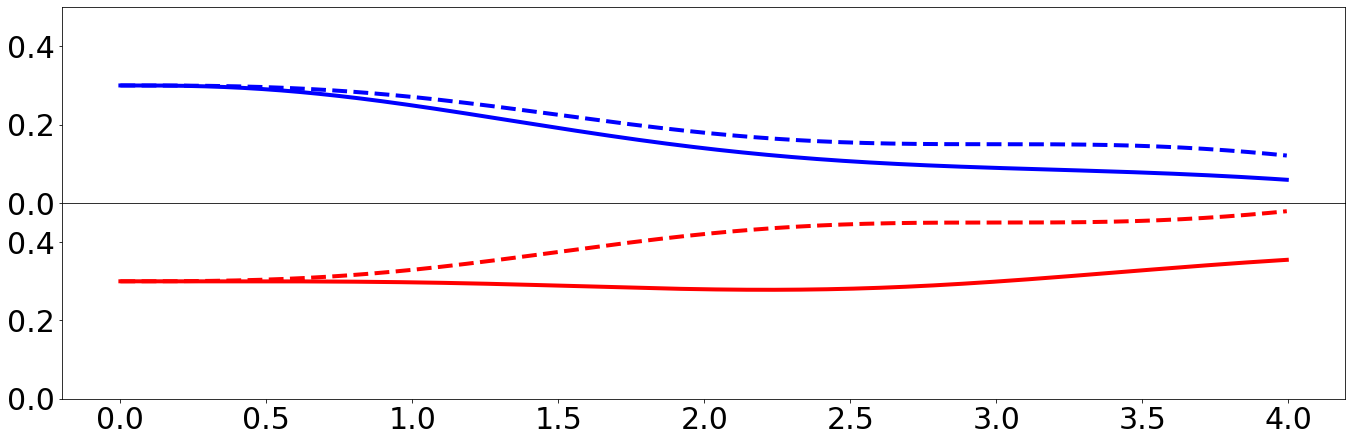

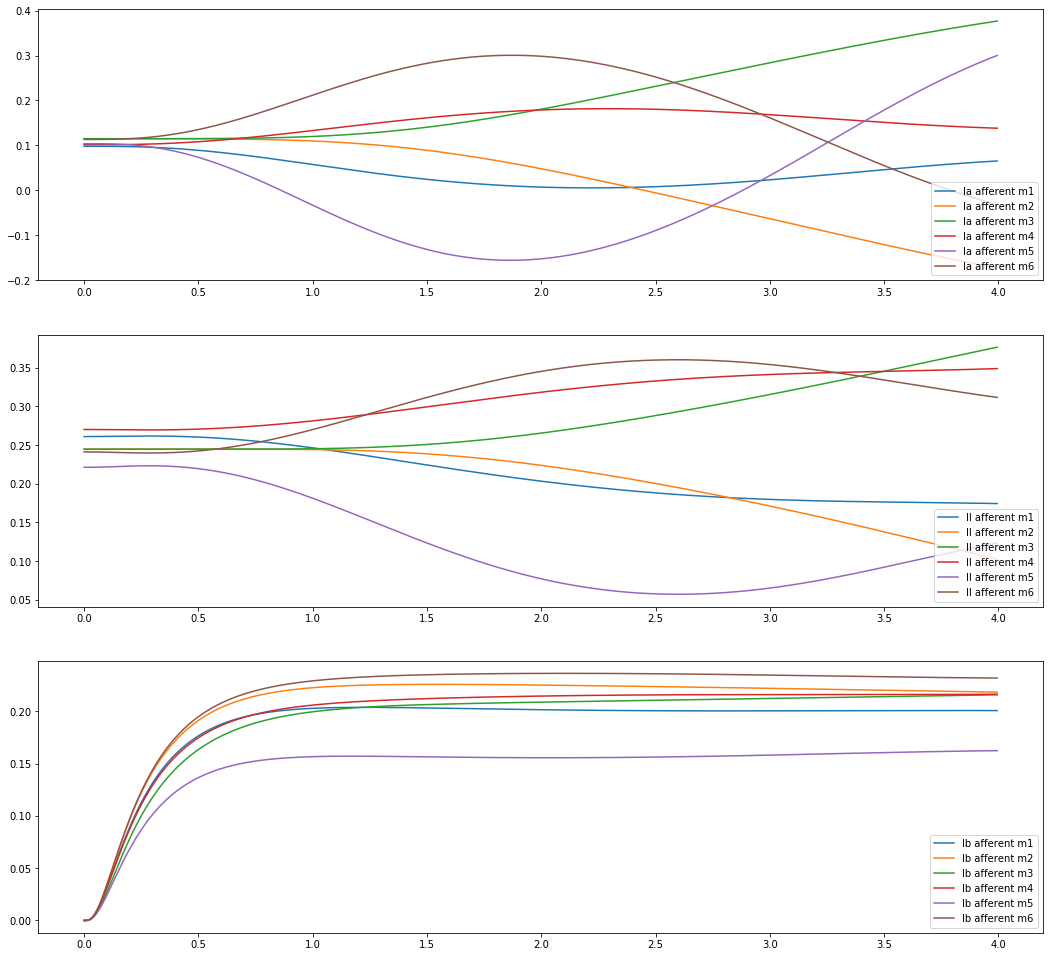

[[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -1.1622398916770107], [-1.0, 3.0, -1.0, -1.0, 3.0, 2.0, -1.0, 3.0, 1.0, 1.1351350547174703, -0.15255375321934372, 1.1188938967060833, 1.1796017069915812, -0.14077484943606247, 0.16274879394561953, 1.11

Initial state. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:11.725003, e2:11.725003, e3:11.725003
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103

uid:0, sid:11, e1:11.725003, e2:11.725003, e3:11.725003
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:11.725003, e2:11.725003, e3:11.725003
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472,

uid:0, sid:23, e1:11.725003, e2:11.725003, e3:11.725003
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:11.725003, e2:11.725003, e3:11.725003
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472

uid:0, sid:35, e1:11.724500, e2:11.724999, e3:11.652036
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:11.652036, e2:11.724500, e3:9.677639
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.83747854

uid:0, sid:47, e1:9.677639, e2:9.677639, e3:9.677639
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.1587189289562907]
Initial state. unit 1 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -1.1622398916770107]
uid:1, sid:0, e1:9.677639, e2:9.677639, e3:9.677639
change. 

uid:2, sid:11, e1:9.671614, e2:9.671614, e3:9.671615
change. unit 2 test syns: : [-1.0, 2.0, -1.0, -1.0, 2.0, 1.0, -1.0, 2.0, 0.0, 2.1351350547174706, -1.1525537532193437, 2.1188938967060835, 1.1796017069915812, -0.14077484943606247, 0.16274879394561953, 1.115349330181512, 0.10736233653214483, 0.03939859321099051, -1.0037987958821297]
uid:2, sid:12, e1:9.671614, e2:9.671614, e3:9.671614
change. unit 2 test syns: : [-1.0, 2.0, -1.0, -1.0, 2.0, 1.0, -1.0, 2.0, 0.0, 2.1351350547174706, -1.1525537532193437, 2.1188938967060835, 2.179601706991581, -0.14077484943606247, 0.16274879394561953, 1.115349330181512, 0.10736233653214483, 0.03939859321099051, -1.0037987958821297]
uid:2, sid:13, e1:9.671614, e2:9.671615, e3:9.671614
change. unit 2 test syns: : [-1.0, 2.0, -1.0, -1.0, 2.0, 1.0, -1.0, 2.0, 0.0, 2.1351350547174706, -1.1525537532193437, 2.1188938967060835, 2.179601706991581, -1.1407748494360626, 0.16274879394561953, 1.115349330181512, 0.10736233653214483, 0.03939859321099051, -1.0037987958

uid:5, sid:0, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901870451

uid:5, sid:8, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901870451

uid:5, sid:16, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:24, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:32, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:40, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:48, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.13814126740529642, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:5, sid:56, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.0865310790876459, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:5, sid:64, e1:9.577658, e2:9.577658, e3:9.577658
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:6, sid:12, e1:9.576782, e2:9.576782, e3:9.576782
change. unit 6 test syns: : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -1.0322685639185025]
uid:6, sid:13, e1:9.576782, e2:9.576782, e3:9.576782
change. unit 6 test syns: : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -0.00823792053350672, -0.1631240253647102, -1.0322685639185025]
uid:6, sid:14, e1:9.576782, e2:9.576782, e3:9.576782
change. unit 6 test syns: : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -0.1631240253647102, -1.0322685639185025]
uid:6, sid:15, e1:9.576782, e2:9.576782, e3:9.576782
change. unit 6 te

uid:7, sid:16, e1:9.527033, e2:9.527033, e3:9.527043
change. unit 7 test syns: : [-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0, 1.0, -1.0, 2.0047829728710416, -1.1828675575324912, 2.1225184615239185, -1.1031205340348236, 2.1392844387905736, 0.07823594326208005, 0.944530745880461, 0.0022805758184336056, 0.917668968965553, 1.0640338279798918, 0.013654140641639195, 0.8779264242739213, -1.1472959614818588]
uid:7, sid:17, e1:9.527033, e2:9.527064, e3:9.527031
change. unit 7 test syns: : [-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0, 1.0, -1.0, 2.0047829728710416, -1.1828675575324912, 2.1225184615239185, -1.1031205340348236, 2.1392844387905736, -0.92176405673792, 0.944530745880461, 0.0022805758184336056, 0.917668968965553, 1.0640338279798918, 0.013654140641639195, 0.8779264242739213, -1.1472959614818588]
uid:7, sid:18, e1:9.527031, e2:9.527031, e3:9.527032
change. unit 7 test syns: : [-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0, 1.0, -1.0, 2.0047829728710416, -

uid:8, sid:14, e1:9.504903, e2:9.504903, e3:9.504903
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
uid:8, sid:15, e1:9.504903, e2:9.504903, e3:9.504903
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.1810271952951994, 0.8272427265478529]
uid:8, sid:16, e1:9.504903, e2:9.504896, e3:9.512366
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 1.827242726547853]
Initial state. unit 9 test syns: : [1.0, 1.0, 1.0, -0.12017333302403843, 1.0, 

uid:10, sid:2, e1:9.503409, e2:9.503409, e3:9.503409
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521,

uid:10, sid:10, e1:7.281315, e2:7.316951, e3:10.270361
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521

uid:10, sid:18, e1:6.986868, e2:7.047690, e3:7.414778
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 

uid:10, sid:26, e1:6.986868, e2:7.030632, e3:7.002213
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 

uid:10, sid:34, e1:6.986868, e2:7.976237, e3:32.087994
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521,

uid:10, sid:42, e1:6.986868, e2:6.986868, e3:6.986868
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 

uid:10, sid:50, e1:6.986868, e2:6.986868, e3:6.986868
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469278, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 

uid:10, sid:58, e1:6.986868, e2:7.976237, e3:32.087994
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521,

uid:10, sid:66, e1:6.986868, e2:7.976237, e3:32.087994
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521,

uid:12, sid:1, e1:6.986864, e2:6.986864, e3:6.986864
change. unit 12 test syns: : [-1.0, -1.0, 3.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.03354591966834111, 1.0491727879677535]
uid:12, sid:2, e1:6.986864, e2:6.986864, e3:6.986864
change. unit 12 test syns: : [-1.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.03354591966834111, 1.0491727879677535]
uid:12, sid:3, e1:6.986864, e2:6.986864, e3:6.986864
change. unit 12 test syns: : [-1.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458

uid:12, sid:21, e1:6.986864, e2:6.986864, e3:6.986864
change. unit 12 test syns: : [-1.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 1.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.029502853831418, 0.8139120089211453, 0.03354591966834111, 1.0491727879677535]
uid:12, sid:22, e1:6.986864, e2:6.986864, e3:6.986864
change. unit 12 test syns: : [-1.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 1.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.03354591966834111, 1.0491727879677535]
uid:12, sid:23, e1:6.986864, e2:6.986864, e3:6.986864
change. unit 12 test syns: : [-1.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.8451087523694

uid:14, sid:3, e1:6.986863, e2:7.016210, e3:6.988035
change. unit 14 test syns: : [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:4, e1:6.986863, e2:6.994513, e3:6.996146
change. unit 14 test syns: : [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:5, e1:6.986863, e2:7.006391, e3:6.987360
change. unit 14 test syns: : [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:6, e1:6.986863, e2:7.246860, e3:7.095785
change. unit 14 test syns: : [2.0, 2.0, 2.0, -0.07757

uid:15, sid:7, e1:6.986863, e2:6.986863, e3:6.986863
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 0.17490195265873015, -1.0273080496544464, -0.9508702000358867, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:8, e1:6.986863, e2:6.986863, e3:6.986863
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939

uid:15, sid:19, e1:6.986863, e2:6.986863, e3:6.986863
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 0.17490195265873015, -1.0273080496544464, -0.9508702000358867, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:20, e1:6.986863, e2:6.986863, e3:6.986863
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.89

uid:15, sid:31, e1:6.986862, e2:6.986863, e3:6.986610
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.10604317463073965, 0.16720986496267431, -0.19742285956117844, 0.0005263000573993981, 0.18599235606528786, 0.17490195265873015, -1.0273080496544464, -0.9508702000358867, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:32, e1:6.986610, e2:6.986862, e3:6.977595
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.146207211454

uid:15, sid:43, e1:6.950044, e2:6.953436, e3:6.946399
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.10604317463073965, 0.16720986496267431, -0.19742285956117844, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, -0.027308049654446442, 0.04912979996411326, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.1027960834411803, -1.0173429449096223, 0.9049191561181354, 1.1431410741645687, -1.0205073584638849, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:44, e1:6.946399, e2:6.950044, e3:6.942465
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824,

uid:17, sid:3, e1:6.926187, e2:6.926187, e3:6.926187
change. unit 17 test syns: : [-2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0016592199893637, 1.1424804052554314, -1.0675076877805296, 0.8906280792603629, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -1.0264034916365334]
uid:17, sid:4, e1:6.926187, e2:6.926187, e3:6.926187
change. unit 17 test syns: : [-2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0016592199893637, 1.1424804052554314, -1.0675076877805296, 0.8906280792603629, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -1.0264034916365334]
uid:17, sid:5, e1:6.926187, e2:6.926187, e3:6.926187
change. unit 17 test syns: : [-2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0016592199893637, 1.1424804052554314, -1.0675076877805296, 0.8906280792603629, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -1.0264

uid:18, sid:10, e1:6.926154, e2:6.926187, e3:6.926148
change. unit 18 test syns: : [-2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.07324899607264745, 0.136232866224695, 0.05699221383432507, -0.0024841074603887403, -1.0158459285667423, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:11, e1:6.926148, e2:6.926154, e3:6.926148
change. unit 18 test syns: : [-2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.07324899607264745, 0.136232866224695, 0.05699221383432507, -0.0024841074603887403, -1.0158459285667423, -0.9720747612460625, 0.9167197665136751]
uid:18, sid:12, e1:6.926148, e2:6.926188, e3:47.163435
change. unit 18 test syns: : [-2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.07324899607264745, 0.136232866224695, 0.05699221383432507, -0.0024841074603887403, -1.0158459285667423, -0.9720747612460625, 0.9167197665136751]
Initial state. unit 19 test syns: : [2.0, 2.0, 2.0, 0.09486501131200953, -0.009611386985856202, -0.04902458883244548, -0.08857752939243176]
uid:19, sid:0, e1:6.926148, e2:7.659447, e3:6.205046
change. unit 19 test

uid:20, sid:5, e1:4.362835, e2:4.362835, e3:4.362835
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.0473841552942905

uid:20, sid:13, e1:4.362798, e2:4.360325, e3:4.362799
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, 

uid:20, sid:21, e1:4.359769, e2:4.358703, e3:4.360711
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0

uid:20, sid:29, e1:4.235540, e2:4.235540, e3:4.235540
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12

uid:20, sid:37, e1:3.800769, e2:3.800769, e3:3.800769
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120887, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657

uid:20, sid:45, e1:3.800769, e2:3.800769, e3:3.800769
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141696, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657

uid:20, sid:53, e1:3.800769, e2:3.800769, e3:3.800769
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657

uid:20, sid:61, e1:2.861882, e2:2.861882, e3:2.861882
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.126576

uid:21, sid:1, e1:2.861882, e2:2.861882, e3:2.861882
change. unit 21 test syns: : [4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 0.07986235687947951]
uid:21, sid:2, e1:2.861882, e2:2.861882, e3:2.861882
change. unit 21 test syns: : [4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 0.07986235687947951]
uid:21, sid:3, e1:2.861882, e2:2.861882, e3:2.861882
change. unit 21 test syns: : [4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 1.0, 3.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 0.07986235687947951]
uid:21, sid:4, e1:2.861882, e2:2.861882, e3:2.861882
change. unit 21 test syns: : [4.0, 4.0, 4.0,

uid:22, sid:8, e1:2.605628, e2:2.605628, e3:2.605628
change. unit 22 test syns: : [0.0, 0.0, -4.0, 0.0, -4.0, 0.0, -4.0, -4.0, 0.0, -3.0, -3.0, 1.0, -0.9015012693932637, -1.0014315863043342, -0.923588366567365, -0.9113061211932749, -1.13068629232945, -1.1245910633521503, -1.0723387390364125, -0.9425641866041556, -1.0591941786574488, 0.005892998126817484, 0.05902133448936586, -0.9722201900377173, 0.03572139821834802]
uid:22, sid:9, e1:2.605628, e2:2.605628, e3:2.605628
change. unit 22 test syns: : [0.0, 0.0, -4.0, 0.0, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -3.0, 1.0, -0.9015012693932637, -1.0014315863043342, -0.923588366567365, -0.9113061211932749, -1.13068629232945, -1.1245910633521503, -1.0723387390364125, -0.9425641866041556, -1.0591941786574488, 0.005892998126817484, 0.05902133448936586, -0.9722201900377173, 0.03572139821834802]
uid:22, sid:10, e1:2.605628, e2:2.605628, e3:2.605628
change. unit 22 test syns: : [0.0, 0.0, -4.0, 0.0, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, 1.0, -0.9015012

uid:23, sid:3, e1:2.598204, e2:2.598179, e3:2.598234
change. unit 23 test syns: : [4.0, -4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0298633255087544, -0.8474656173105753, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:4, e1:2.598179, e2:2.598142, e3:2.598231
change. unit 23 test syns: : [4.0, -4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0298633255087544, -0.8474656173105753, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:5, e1:2.598142, e2:2.598128, e3:2.598160
change. unit 23 test syns: : [4.0, -4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 1.0298633255087544, -0.8474656173105753, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:6, e1:2.598128, e2:2.598112, e3:2.598151
change. 

uid:25, sid:0, e1:2.439198, e2:2.439932, e3:2.439196
change. unit 25 test syns: : [-2.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913133346

uid:25, sid:8, e1:2.437688, e2:2.437688, e3:2.437688
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:16, e1:2.437590, e2:2.436566, e3:2.437590
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:24, e1:2.435110, e2:2.435110, e3:2.435110
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:32, e1:2.434462, e2:2.434462, e3:2.434462
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:40, e1:2.433229, e2:2.433229, e3:2.433229
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.1741

uid:25, sid:48, e1:2.433229, e2:2.433229, e3:2.433229
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.06739265974140962, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.174

uid:25, sid:56, e1:2.433229, e2:2.433229, e3:2.433229
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.1741195

uid:25, sid:64, e1:2.433229, e2:2.433229, e3:2.433229
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.174119

uid:26, sid:12, e1:2.433228, e2:2.433229, e3:2.433197
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231314, 0.0951016070985713, 0.10734486483304195, 0.14080842427639606, -0.09623091031957065, 0.9378711649523268, 0.8970551066605787, 0.07195458054188147, 1.1874500932652616]
uid:26, sid:13, e1:2.433197, e2:2.433228, e3:2.432611
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231314, 0.0951016070985713, 0.10734486483304195, 0.14080842427639606, -0.09623091031957065, -0.06212883504767319, 0.8970551066605787, 0.07195458054188147, 1.1874500932652616]
uid:26, sid:14, e1:2.432611, e2:2.433197, e3:2.427031
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231314, 0.0951016070985713, 0.10734486483304195, 0.14080842427639606, -0.09623091031957065, -0.06212883504767319, -0.10294489333942125, 0.07195458054188147, 1.1874500932652616]
uid:26, sid:15, e1:2.427031, e2:2.432611, e3:2.422144
change.

uid:27, sid:16, e1:2.359862, e2:2.359862, e3:2.359862
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 2.044256085427085, 1.8414636623546126, -0.9661408416068481, -0.8051148592223745, 2.166254474436637, -0.14810229768484195, 0.8345472733379895, 0.9271177977626888, -0.1952109005534342, 1.0248987521150206, 1.139846445668739, -0.10801866734895237, -0.9198001029069299]
uid:27, sid:17, e1:2.359862, e2:2.359862, e3:2.359862
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 2.044256085427085, 1.8414636623546126, -0.9661408416068481, -0.8051148592223745, 2.166254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -0.1952109005534342, 1.0248987521150206, 1.139846445668739, -0.10801866734895237, -0.9198001029069299]
uid:27, sid:18, e1:2.359862, e2:2.359862, e3:2.359862
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 2.044256085427085,

uid:28, sid:14, e1:2.269300, e2:2.282743, e3:2.269303
change. unit 28 test syns: : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.09965542364504, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.030578534901781418, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:15, e1:2.269300, e2:2.282743, e3:2.269303
change. unit 28 test syns: : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.09965542364504, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:16, e1:2.269300, e2:25.157806, e3:2.284756
change. unit 28 test syns: : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.09965542364504, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571358]
Initial state. unit 29 test syns: : [1.0, 1.0, -1.134466962960195, 2

Iteration: 2
Error: 2.258659149221591
Execution time: 104717.22100877762 seconds


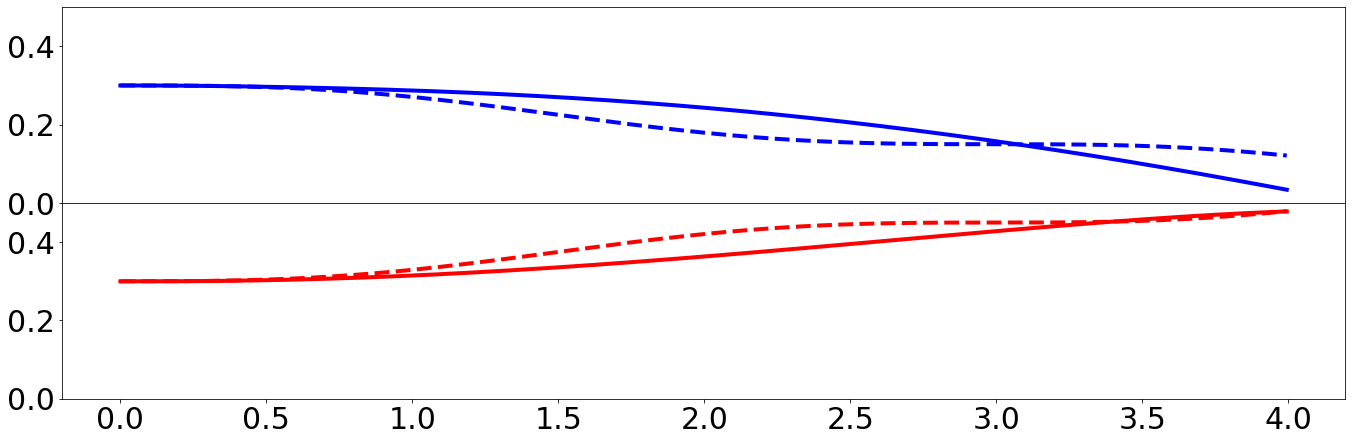

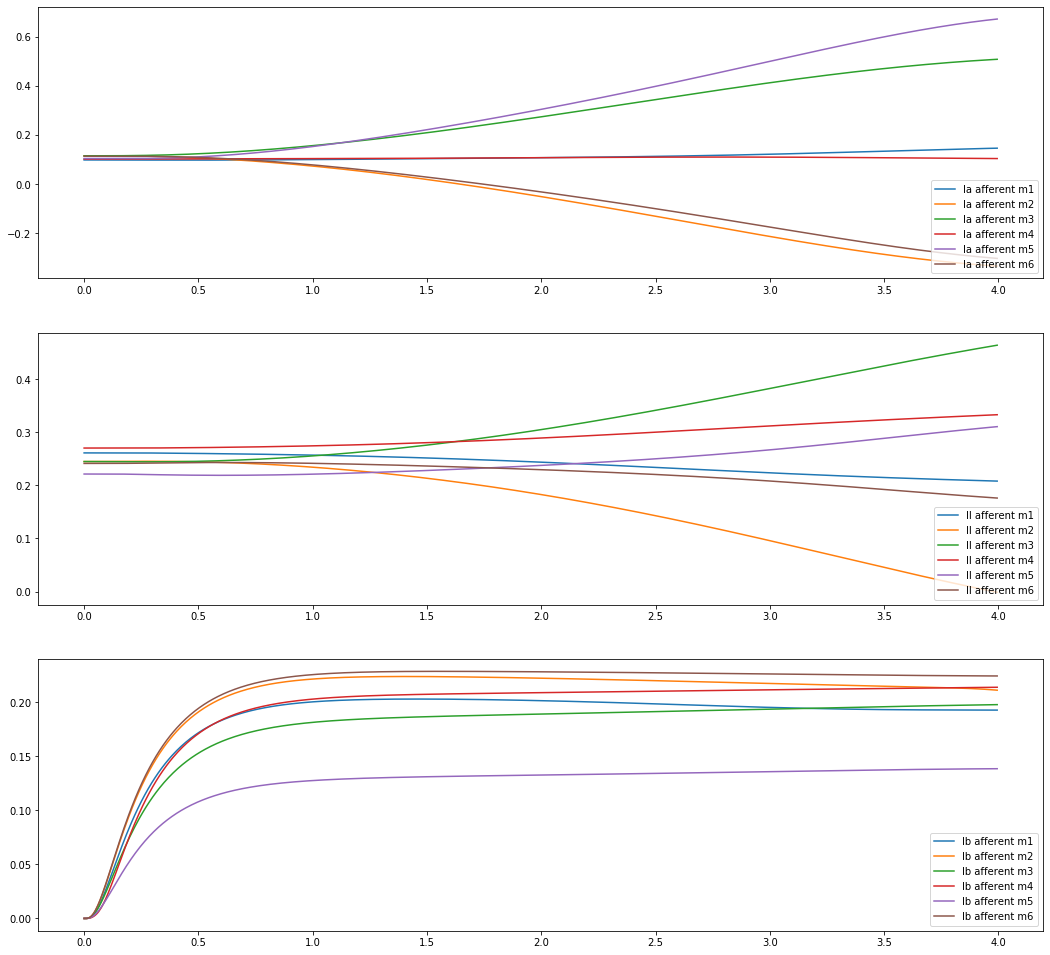

[[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.045860810894677084, 0.04362550769485973, 0.07387394628298527, -0.0995948130344706, -1.1622398916770107], [-1.0, 2.0, -1.0, -1.0, 2.0, 1.0, -1.0, 2.0, 0.0, 2.1351350547174706, -1.1525537532193437, 2.1188938967060835, 2.179601706991581, -1.1407748494360626, -0.8372512060543804,

Initial state. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:2.258659, e2:2.257963, e3:2.259412
change. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0

uid:0, sid:11, e1:2.255292, e2:2.415897, e3:2.466731
change. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:2.255292, e2:2.317898, e3:2.251017
change. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.837478541974747

uid:0, sid:23, e1:2.238043, e2:2.238043, e3:2.238043
change. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:2.238043, e2:3.440410, e3:7.796452
change. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.837478541974747

uid:0, sid:35, e1:2.238043, e2:3.440410, e3:7.796452
change. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:2.238043, e2:3.440410, e3:7.796452
change. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.837478541974747

uid:0, sid:47, e1:2.238043, e2:2.238043, e3:2.238043
change. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
Initial state. unit 1 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.045860810894677084, 0.04362550769485973, 0.07387394628298527, -0.0995948130344706, -1.1622398916770107]
uid:1, sid:0, e1:2.238043, e2:2.237742, e3:2.238344
change

uid:2, sid:11, e1:2.233844, e2:2.233844, e3:2.233844
change. unit 2 test syns: : [-1.5, 1.5, -1.0, -1.0, 1.5, 1.0, -0.5, 2.0, 0.0, 1.6351350547174706, -1.6525537532193437, 2.1188938967060835, 2.179601706991581, -1.1407748494360626, -0.8372512060543804, 2.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297]
uid:2, sid:12, e1:2.233844, e2:2.233844, e3:2.233844
change. unit 2 test syns: : [-1.5, 1.5, -1.0, -1.0, 1.5, 1.0, -0.5, 2.0, 0.0, 1.6351350547174706, -1.6525537532193437, 2.1188938967060835, 2.179601706991581, -1.1407748494360626, -0.8372512060543804, 2.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297]
uid:2, sid:13, e1:2.233844, e2:2.233844, e3:2.233844
change. unit 2 test syns: : [-1.5, 1.5, -1.0, -1.0, 1.5, 1.0, -0.5, 2.0, 0.0, 1.6351350547174706, -1.6525537532193437, 2.1188938967060835, 2.179601706991581, -1.6407748494360626, -0.8372512060543804, 2.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821

uid:5, sid:0, e1:2.163797, e2:2.163797, e3:2.163797
change. unit 5 test syns: : [2.5, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901870451

uid:5, sid:8, e1:2.163705, e2:2.163706, e3:2.163704
change. unit 5 test syns: : [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901870451

uid:5, sid:16, e1:2.163544, e2:2.163544, e3:2.163544
change. unit 5 test syns: : [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:24, e1:2.163219, e2:2.163673, e3:2.161938
change. unit 5 test syns: : [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:32, e1:2.160192, e2:2.160192, e3:2.160192
change. unit 5 test syns: : [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:40, e1:2.103604, e2:2.103604, e3:2.103604
change. unit 5 test syns: : [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:5, sid:48, e1:1.867772, e2:1.937821, e3:1.810161
change. unit 5 test syns: : [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:56, e1:1.794288, e2:1.794288, e3:1.794288
change. unit 5 test syns: : [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.08653107908764601, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187

uid:5, sid:64, e1:1.794288, e2:1.810161, e3:1.871102
change. unit 5 test syns: : [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:6, sid:12, e1:1.794232, e2:1.794232, e3:1.794232
change. unit 6 test syns: : [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:13, e1:1.794232, e2:1.794232, e3:1.794232
change. unit 6 test syns: : [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:14, e1:1.794232, e2:1.794232, e3:1.794232
change. unit 6 test syns: : [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:15, e1:1.794232, e2:1.794232, e3:1.794

uid:7, sid:16, e1:1.791777, e2:1.791797, e3:1.791777
change. unit 7 test syns: : [-1.5, -0.5, -1.5, -0.5, -1.5, -0.5, -1.5, -0.5, -1.5, -1.5, 1.5, -1.5, 1.5047829728710416, -1.6828675575324912, 1.6225184615239185, -1.6031205340348236, 2.1392844387905736, -0.92176405673792, 1.944530745880461, -0.9977194241815663, 1.917668968965553, 2.064033827979892, -0.9863458593583608, 1.8779264242739213, -2.1472959614818588]
uid:7, sid:17, e1:1.791777, e2:1.791797, e3:1.791777
change. unit 7 test syns: : [-1.5, -0.5, -1.5, -0.5, -1.5, -0.5, -1.5, -0.5, -1.5, -1.5, 1.5, -1.5, 1.5047829728710416, -1.6828675575324912, 1.6225184615239185, -1.6031205340348236, 2.1392844387905736, -0.92176405673792, 1.944530745880461, -0.9977194241815663, 1.917668968965553, 2.064033827979892, -0.9863458593583608, 1.8779264242739213, -2.1472959614818588]
uid:7, sid:18, e1:1.791777, e2:1.791797, e3:1.791777
change. unit 7 test syns: : [-1.5, -0.5, -1.5, -0.5, -1.5, -0.5, -1.5, -0.5, -1.5, -1.5, 1.5, -1.5, 1.5047829728710416,

uid:8, sid:14, e1:1.790343, e2:1.790343, e3:1.790343
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 1.827242726547853]
uid:8, sid:15, e1:1.790343, e2:1.790343, e3:1.790343
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 1.827242726547853]
uid:8, sid:16, e1:1.790343, e2:1.790343, e3:1.790343
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 1.327242726547853]
Initial state. unit 9 test syns: : [0.0, 0.0, 0.0, -0.12017333302403843, 0.0, -

uid:10, sid:2, e1:1.788452, e2:1.788452, e3:1.788452
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0

uid:10, sid:10, e1:1.767020, e2:1.703291, e3:1.861202
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 

uid:10, sid:18, e1:1.645069, e2:1.620430, e3:1.690351
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521,

uid:10, sid:26, e1:1.586938, e2:1.586930, e3:1.586949
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0

uid:10, sid:34, e1:1.586924, e2:1.586939, e3:1.611881
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0

uid:10, sid:42, e1:1.586924, e2:1.586924, e3:1.586924
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0

uid:10, sid:50, e1:1.586914, e2:1.586923, e3:1.586806
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17

uid:10, sid:58, e1:1.517168, e2:1.573433, e3:1.363774
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.177

uid:10, sid:66, e1:1.292012, e2:1.363774, e3:2.309627
change. unit 10 test syns: : [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.177

uid:12, sid:1, e1:1.241456, e2:1.241456, e3:1.241456
change. unit 12 test syns: : [-1.5, -0.5, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 1.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.03354591966834111, 2.0491727879677537]
uid:12, sid:2, e1:1.241456, e2:1.241456, e3:1.241456
change. unit 12 test syns: : [-1.5, -0.5, 3.5, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 1.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.03354591966834111, 2.0491727879677537]
uid:12, sid:3, e1:1.241456, e2:1.241456, e3:1.241456
change. unit 12 test syns: : [-1.5, -0.5, 3.5, 0.5, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458

uid:12, sid:21, e1:1.241456, e2:1.241456, e3:1.241456
change. unit 12 test syns: : [-1.5, -0.5, 3.5, 0.5, -0.5, 2.5, -0.5, 2.5, -0.5, -0.5, 2.5, -1.5, -0.34510875236945804, -0.6546036144462242, 1.3357711942458048, 0.3300825339314496, -0.46453194725307556, 0.6627842153710266, -0.5671218383881333, 0.5829756725808823, -0.4327493561324719, -0.5295028538314182, 0.8139120089211453, 0.03354591966834111, 2.0491727879677537]
uid:12, sid:22, e1:1.241456, e2:1.241456, e3:1.241456
change. unit 12 test syns: : [-1.5, -0.5, 3.5, 0.5, -0.5, 2.5, -0.5, 2.5, -0.5, -0.5, 2.5, -1.5, -0.34510875236945804, -0.6546036144462242, 1.3357711942458048, 0.3300825339314496, -0.46453194725307556, 0.6627842153710266, -0.5671218383881333, 0.5829756725808823, -0.4327493561324719, -0.5295028538314182, 0.31391200892114535, 0.03354591966834111, 2.0491727879677537]
uid:12, sid:23, e1:1.241456, e2:1.241456, e3:1.241456
change. unit 12 test syns: : [-1.5, -0.5, 3.5, 0.5, -0.5, 2.5, -0.5, 2.5, -0.5, -0.5, 2.5, -1.5, -0.34510

uid:14, sid:3, e1:1.188107, e2:1.197181, e3:1.190583
change. unit 14 test syns: : [1.5, 1.5, 1.5, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:4, e1:1.188107, e2:1.190092, e3:1.186036
change. unit 14 test syns: : [1.5, 1.5, 1.5, -0.07757993049566014, 1.5, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:5, e1:1.186036, e2:1.194930, e3:1.183086
change. unit 14 test syns: : [1.5, 1.5, 1.5, -0.07757993049566014, 1.5, -0.2303238550374873, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:6, e1:1.183086, e2:1.195495, e3:1.173045
change. unit 14 test syns: : [1.5, 1.5, 1.5, -0.0775

uid:15, sid:7, e1:0.915049, e2:0.927195, e3:0.907411
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.10604317463073965, 0.16720986496267431, -0.19742285956117844, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, -0.027308049654446442, 0.04912979996411326, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.1027960834411803, -1.0173429449096223, 0.9049191561181354, 1.1431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178]
uid:15, sid:8, e1:0.907411, e2:0.981859, e3:0.998104
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.

uid:15, sid:19, e1:0.905216, e2:0.922862, e3:0.935405
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -2.5, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.10604317463073965, 0.16720986496267431, -0.19742285956117844, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, -0.027308049654446442, 0.04912979996411326, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.1027960834411803, -1.0173429449096223, 0.9049191561181354, 1.1431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178]
uid:15, sid:20, e1:0.905216, e2:0.907473, e3:0.909807
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -2.5, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -

uid:15, sid:31, e1:0.903706, e2:1.040197, e3:1.438209
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -2.5, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.10604317463073965, 0.6672098649626743, 0.30257714043882156, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, -0.027308049654446442, 0.04912979996411326, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.1027960834411803, -1.0173429449096223, 0.9049191561181354, 1.1431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178]
uid:15, sid:32, e1:0.903706, e2:1.040197, e3:1.438209
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -2.5, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.106043

uid:15, sid:43, e1:0.901704, e2:1.017750, e3:1.460804
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -2.5, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.10604317463073965, 0.6672098649626743, 0.30257714043882156, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, 0.47269195034555356, 0.5491297999641133, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.6027960834411803, -1.0173429449096223, 1.4049191561181353, 1.6431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178]
uid:15, sid:44, e1:0.901704, e2:1.017750, e3:1.460804
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -2.5, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.106043174

uid:17, sid:3, e1:0.884256, e2:0.884256, e3:0.884256
change. unit 17 test syns: : [-2.5, -1.5, 1.5, -1.5, 1.0, 1.0, -1.0, 1.0, 1.0, 2.0016592199893637, 2.1424804052554314, -2.0675076877805294, 1.890628079260363, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -2.0264034916365334]
uid:17, sid:4, e1:0.884256, e2:0.884256, e3:0.884256
change. unit 17 test syns: : [-2.5, -1.5, 1.5, -1.5, 1.5, 1.0, -1.0, 1.0, 1.0, 2.0016592199893637, 2.1424804052554314, -2.0675076877805294, 1.890628079260363, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -2.0264034916365334]
uid:17, sid:5, e1:0.884256, e2:0.884256, e3:0.884256
change. unit 17 test syns: : [-2.5, -1.5, 1.5, -1.5, 1.5, 1.5, -1.0, 1.0, 1.0, 2.0016592199893637, 2.1424804052554314, -2.0675076877805294, 1.890628079260363, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -2.0264034

uid:18, sid:10, e1:0.881415, e2:0.881415, e3:0.881415
change. unit 18 test syns: : [-1.5, 3.5, 3.5, 3.5, 3.5, 3.5, 0.5732489960726475, -0.363767133775305, -0.44300778616567493, -0.0024841074603887403, -1.0158459285667423, -0.9720747612460625, 0.9167197665136751]
uid:18, sid:11, e1:0.881415, e2:0.881415, e3:0.881415
change. unit 18 test syns: : [-1.5, 3.5, 3.5, 3.5, 3.5, 3.5, 0.5732489960726475, -0.363767133775305, -0.44300778616567493, -0.0024841074603887403, -1.0158459285667423, -0.9720747612460625, 0.9167197665136751]
uid:18, sid:12, e1:0.881415, e2:0.884303, e3:23.388985
change. unit 18 test syns: : [-1.5, 3.5, 3.5, 3.5, 3.5, 3.5, 0.5732489960726475, -0.363767133775305, -0.44300778616567493, -0.0024841074603887403, -1.0158459285667423, -0.9720747612460625, 0.9167197665136751]
Initial state. unit 19 test syns: : [1.0, 1.0, 1.0, -0.9051349886879905, -1.0096113869858563, -1.0490245888324454, -0.08857752939243176]
uid:19, sid:0, e1:0.881415, e2:0.881929, e3:0.881000
change. unit 19 test

uid:20, sid:5, e1:0.661524, e2:0.661524, e3:2.939043
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.1265764

uid:20, sid:13, e1:0.661524, e2:0.661524, e3:2.961334
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.126576

uid:20, sid:21, e1:0.628478, e2:0.628478, e3:0.650786
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657

uid:20, sid:29, e1:0.617073, e2:0.617073, e3:0.617073
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657

uid:20, sid:37, e1:0.616702, e2:0.616702, e3:0.616702
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.1265

uid:20, sid:45, e1:0.616702, e2:0.616702, e3:0.616702
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.1265

uid:20, sid:53, e1:0.616702, e2:0.778718, e3:2.154776
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.1265

uid:20, sid:61, e1:0.616702, e2:0.616702, e3:0.616702
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.1265

uid:21, sid:1, e1:0.616702, e2:0.616702, e3:0.616702
change. unit 21 test syns: : [4.5, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.153854960042208, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.9201376431205205]
uid:21, sid:2, e1:0.616702, e2:0.616702, e3:0.616702
change. unit 21 test syns: : [4.5, 4.0, 4.5, 4.0, 4.0, 4.0, 2.0, 4.0, 2.153854960042208, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.9201376431205205]
uid:21, sid:3, e1:0.616702, e2:0.616702, e3:0.616702
change. unit 21 test syns: : [4.5, 4.0, 4.5, 4.0, 4.0, 4.0, 2.0, 4.0, 2.153854960042208, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.9201376431205205]
uid:21, sid:4, e1:0.616702, e2:0.616702, e3:0.616702
change. unit 21 test syns: : [4.5, 4.0, 4.5, 4.0, 

uid:22, sid:8, e1:0.549090, e2:0.554328, e3:0.549245
change. unit 22 test syns: : [-0.5, 0.0, -4.0, -0.5, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, 0.0, 0.0984987306067363, -0.0014315863043341537, -1.923588366567365, 0.08869387880672508, -2.1306862923294503, -0.12459106335215031, -2.0723387390364127, -1.9425641866041556, -0.059194178657448804, -0.9941070018731826, 0.05902133448936586, 0.027779809962282687, 0.03572139821834802]
uid:22, sid:9, e1:0.549090, e2:0.549090, e3:0.549090
change. unit 22 test syns: : [-0.5, 0.0, -4.0, -0.5, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, 0.0, 0.0984987306067363, -0.0014315863043341537, -1.923588366567365, 0.08869387880672508, -2.1306862923294503, -0.12459106335215031, -2.0723387390364127, -1.9425641866041556, -0.059194178657448804, -0.9941070018731826, 0.05902133448936586, 0.027779809962282687, 0.03572139821834802]
uid:22, sid:10, e1:0.549090, e2:0.549090, e3:0.549090
change. unit 22 test syns: : [-0.5, 0.0, -4.0, -0.5, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -

uid:23, sid:3, e1:0.548162, e2:0.548191, e3:0.548132
change. unit 23 test syns: : [3.5, -3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.0, 1.0298633255087544, -1.8474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:4, e1:0.548132, e2:0.548179, e3:0.548084
change. unit 23 test syns: : [3.5, -3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 1.0298633255087544, -1.8474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:5, e1:0.548084, e2:0.548115, e3:0.548052
change. unit 23 test syns: : [3.5, -3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 1.0298633255087544, -1.8474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:6, e1:0.548052, e2:0.548085, e3:0.548018
change. 

uid:25, sid:0, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.1741195

uid:25, sid:8, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.1741195

uid:25, sid:16, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.174119

uid:25, sid:24, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:32, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:40, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:48, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.06739265974140962, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.1741

uid:25, sid:56, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:64, e1:0.505024, e2:0.505024, e3:0.505024
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:26, sid:12, e1:0.484604, e2:0.484682, e3:0.484587
change. unit 26 test syns: : [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.6737301039723131, -0.4048983929014287, -0.39265513516695805, -0.35919157572360394, -0.5962309103195707, -0.06212883504767319, -0.10294489333942125, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:13, e1:0.484587, e2:0.484604, e3:0.484583
change. unit 26 test syns: : [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.6737301039723131, -0.4048983929014287, -0.39265513516695805, -0.35919157572360394, -0.5962309103195707, -0.5621288350476732, -0.10294489333942125, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:14, e1:0.484583, e2:0.484587, e3:0.484582
change. unit 26 test syns: : [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.6737301039723131, -0.4048983929014287, -0.39265513516695805, -0.35919157572360394, -0.5962309103195707, -0.5621288350476732, -0.6029448933394213, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:15, e1:0.484582, e2:0.484583, e3:0.48458

uid:27, sid:16, e1:0.418694, e2:0.418694, e3:0.418694
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.5, -1.5, -1.0, 0.5, 2.044256085427085, 1.8414636623546126, -1.466140841606848, -1.3051148592223745, 2.666254474436637, -1.1481022976848418, 1.8345472733379895, 1.9271177977626888, -1.1952109005534342, 0.024898752115020573, 1.139846445668739, -1.1080186673489523, -1.91980010290693]
uid:27, sid:17, e1:0.418694, e2:0.418694, e3:0.418694
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.5, -1.5, -1.0, 0.5, 2.044256085427085, 1.8414636623546126, -1.466140841606848, -1.3051148592223745, 2.666254474436637, -1.6481022976848418, 1.8345472733379895, 1.9271177977626888, -1.1952109005534342, 0.024898752115020573, 1.139846445668739, -1.1080186673489523, -1.91980010290693]
uid:27, sid:18, e1:0.418694, e2:0.418694, e3:0.418694
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.5, -1.5, -1.0, 0.5, 2.044256085427085, 1.84

uid:28, sid:14, e1:0.418498, e2:0.418498, e3:0.418498
change. unit 28 test syns: : [0.0, -0.5, 0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -1.59965542364504, 0.6436041412907356, 0.15230458371466105, 0.6546564579368124, 0.5393273087908257, 0.575322328883722, 0.030578534901781418, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:15, e1:0.418498, e2:0.418498, e3:0.418498
change. unit 28 test syns: : [0.0, -0.5, 0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -1.59965542364504, 0.6436041412907356, 0.15230458371466105, 0.6546564579368124, 0.5393273087908257, 0.575322328883722, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:16, e1:0.418498, e2:0.418498, e3:0.418498
change. unit 28 test syns: : [0.0, -0.5, 0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -1.59965542364504, 0.6436041412907356, 0.15230458371466105, 0.6546564579368124, 0.5393273087908257, 0.575322328883722, 0.03057853490178139, 0.1847968935382669, -0.3545214184542865]
Initial state. unit 29 test syns: : [2.0, 2.0, -2.134466962960195,

Iteration: 3
Error: 0.39892402116690195
Execution time: 156971.89230298996 seconds


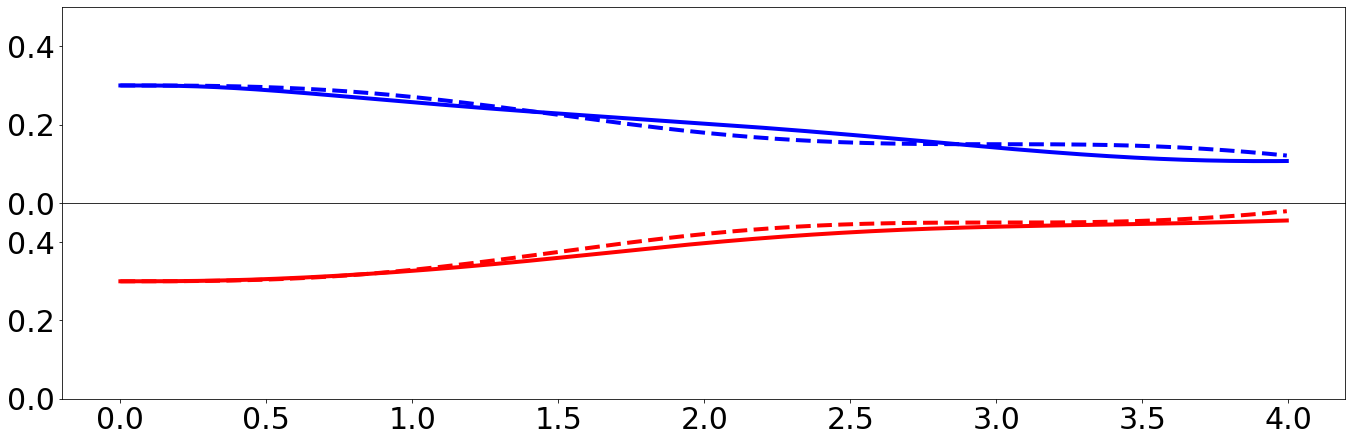

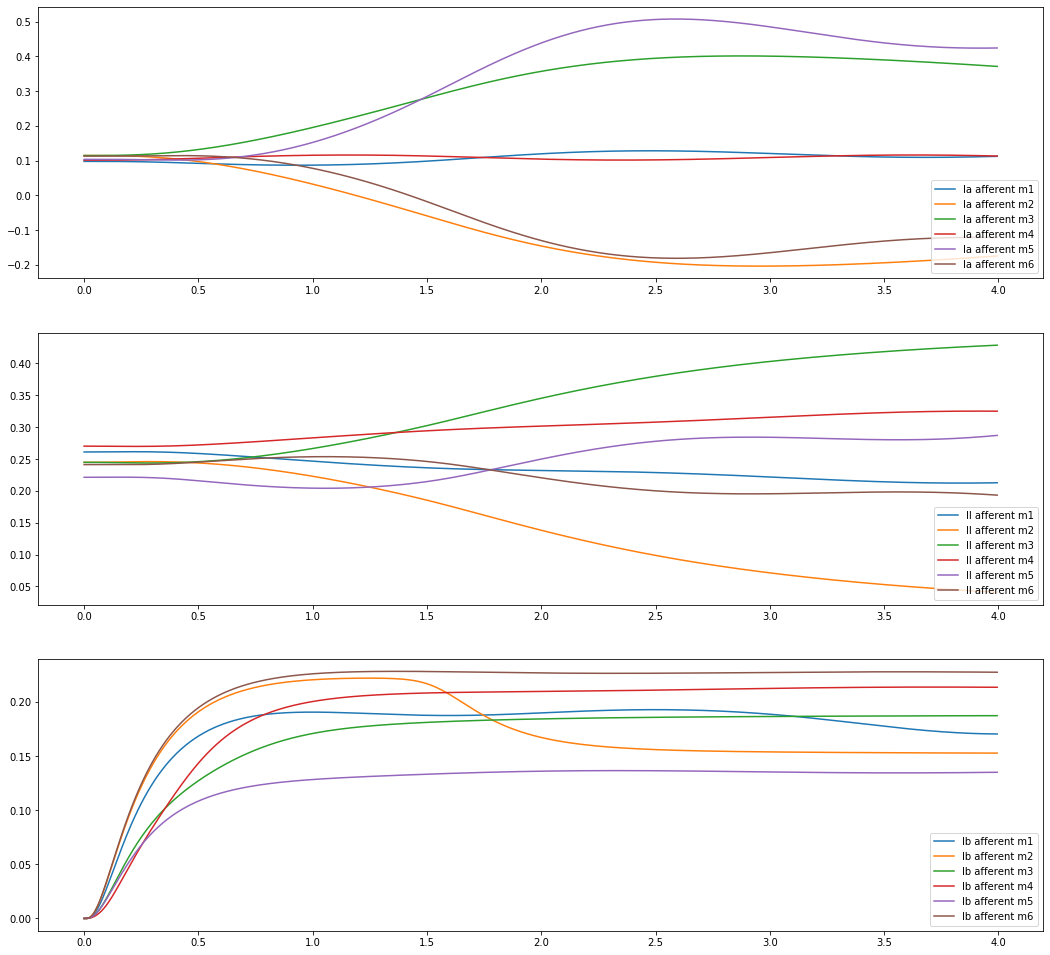

[[3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6088892073321405, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, 0.5738739462829853, 0.4004051869655294, -1.1622398916770107], [-1.5, 1.5, -1.0, -1.0, 1.5, 1.0, -0.5, 2.0, 0.0, 1.6351350547174706, -1.6525537532193437, 2.1188938967060835, 2.179601706991581, -1.6407748494360626, -0.8372512060543804, 2.1153

Initial state. unit 0 test syns: : [3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:0.398924, e2:0.399295, e3:0.398630
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0

uid:0, sid:11, e1:0.398414, e2:0.615248, e3:0.669142
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:0.398414, e2:0.471295, e3:0.418331
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.837478541974747

uid:0, sid:23, e1:0.398257, e2:0.398257, e3:0.398257
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:0.398257, e2:3.373800, e3:5.495864
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.837478541974747

uid:0, sid:35, e1:0.398257, e2:3.373800, e3:5.495864
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:0.398257, e2:3.373800, e3:5.495864
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.837478541974747

uid:0, sid:47, e1:0.398257, e2:0.398257, e3:0.398257
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
Initial state. unit 1 test syns: : [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6088892073321405, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, 0.5738739462829853, 0.4004051869655294, -1.1622398916770107]
uid:1, sid:0, e1:0.398257, e2:0.398257, e3:0.398257
change. unit 

uid:2, sid:12, e1:0.398257, e2:0.398257, e3:0.398257
change. unit 2 test syns: : [-1.0, 1.5, -1.0, -0.5, 1.0, 1.0, -0.5, 1.5, 0.0, 2.1351350547174706, -2.152553753219344, 2.6188938967060835, 2.679601706991581, -1.6407748494360626, -0.8372512060543804, 2.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.5037987958821297]
uid:2, sid:13, e1:0.398257, e2:0.398257, e3:0.398257
change. unit 2 test syns: : [-1.0, 1.5, -1.0, -0.5, 1.0, 1.0, -0.5, 1.5, 0.0, 2.1351350547174706, -2.152553753219344, 2.6188938967060835, 2.679601706991581, -2.1407748494360623, -0.8372512060543804, 2.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.5037987958821297]
uid:2, sid:14, e1:0.398257, e2:0.398257, e3:0.398257
change. unit 2 test syns: : [-1.0, 1.5, -1.0, -0.5, 1.0, 1.0, -0.5, 1.5, 0.0, 2.1351350547174706, -2.152553753219344, 2.6188938967060835, 2.679601706991581, -2.1407748494360623, -1.3372512060543804, 2.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.5037987958821297

uid:5, sid:0, e1:0.382421, e2:0.382476, e3:0.382366
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:8, e1:0.361323, e2:0.361482, e3:0.361166
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187045

uid:5, sid:16, e1:0.354550, e2:0.354551, e3:0.354549
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 4.0, 2.0, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:5, sid:24, e1:0.354356, e2:0.365458, e3:0.368281
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 4.0, 2.0, -3.0, 0.8371200427756724, 2.5, 4.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:5, sid:32, e1:0.354205, e2:0.354205, e3:0.354205
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 4.0, 2.0, -3.0, 0.8371200427756724, 2.5, 4.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 3.0, -3.0, 2.8750446706415755, 2.5, 4.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:5, sid:40, e1:0.354205, e2:0.354205, e3:0.354205
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 4.0, 2.0, -3.0, 0.8371200427756724, 2.5, 4.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 3.0, -3.0, 2.8750446706415755, 2.5, 4.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:5, sid:48, e1:0.354205, e2:0.437363, e3:0.472170
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 4.0, 2.0, -3.0, 0.8371200427756724, 2.5, 4.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 3.0, -3.0, 2.8750446706415755, 2.5, 4.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:5, sid:56, e1:0.354205, e2:0.354205, e3:0.354205
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 4.0, 2.0, -3.0, 0.8371200427756724, 2.5, 4.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 3.0, -3.0, 2.8750446706415755, 2.5, 4.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.08653107908764601, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090187

uid:5, sid:64, e1:0.354205, e2:0.437363, e3:0.472170
change. unit 5 test syns: : [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 4.0, 2.0, -3.0, 0.8371200427756724, 2.5, 4.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 3.0, -3.0, 2.8750446706415755, 2.5, 4.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704

uid:6, sid:12, e1:0.354205, e2:0.354205, e3:0.354205
change. unit 6 test syns: : [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.5322685639185023]
uid:6, sid:13, e1:0.354205, e2:0.354205, e3:0.354205
change. unit 6 test syns: : [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.5322685639185023]
uid:6, sid:14, e1:0.354205, e2:0.354205, e3:0.354205
change. unit 6 test syns: : [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.5322685639185023]
uid:6, sid:15, e1:0.354205, e2:0.354205, e3:0.354

uid:7, sid:16, e1:0.351852, e2:0.351900, e3:0.351915
change. unit 7 test syns: : [-1.0, -1.0, -1.5, -0.5, -1.5, -1.0, -1.5, -1.0, -1.0, -1.5, 2.0, -1.0, 1.5047829728710416, -1.6828675575324912, 1.6225184615239185, -1.6031205340348236, 2.1392844387905736, -0.92176405673792, 1.944530745880461, -0.9977194241815663, 1.917668968965553, 2.064033827979892, -0.48634585935836083, 1.3779264242739213, -1.6472959614818588]
uid:7, sid:17, e1:0.351852, e2:0.351900, e3:0.351915
change. unit 7 test syns: : [-1.0, -1.0, -1.5, -0.5, -1.5, -1.0, -1.5, -1.0, -1.0, -1.5, 2.0, -1.0, 1.5047829728710416, -1.6828675575324912, 1.6225184615239185, -1.6031205340348236, 2.1392844387905736, -0.92176405673792, 1.944530745880461, -0.9977194241815663, 1.917668968965553, 2.064033827979892, -0.48634585935836083, 1.3779264242739213, -1.6472959614818588]
uid:7, sid:18, e1:0.351852, e2:0.351900, e3:0.351915
change. unit 7 test syns: : [-1.0, -1.0, -1.5, -0.5, -1.5, -1.0, -1.5, -1.0, -1.0, -1.5, 2.0, -1.0, 1.504782972871041

uid:8, sid:14, e1:0.350226, e2:0.350226, e3:0.350226
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 1.327242726547853]
uid:8, sid:15, e1:0.350226, e2:0.350226, e3:0.350226
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 1.327242726547853]
uid:8, sid:16, e1:0.350226, e2:0.350226, e3:0.350223
change. unit 8 test syns: : [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.827242726547853]
Initial state. unit 9 test syns: : [-0.5, -0.5, -0.5, 0.37982666697596157, -0.5

uid:10, sid:3, e1:0.343725, e2:0.345878, e3:0.341633
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.1774

uid:10, sid:11, e1:0.308933, e2:0.309011, e3:0.308926
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.177

uid:10, sid:19, e1:0.306669, e2:0.340764, e3:0.336165
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.1774

uid:10, sid:27, e1:0.299006, e2:0.300524, e3:0.298138
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.5, 3.0, -0.8185440755241489, 0.14378352226755986, -1.0, 0.03730154725216783, 0.5, -1.0, 0.3916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.1774

uid:10, sid:35, e1:0.267134, e2:0.342509, e3:2.926134
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.5, 3.0, -0.8185440755241489, 0.14378352226755986, -1.0, 0.03730154725216783, 0.5, -1.0, 0.3916705547275723, 1.0, 3.0, -0.36773649885179394, 0.39158904046991827, -1.0, -0.15431557827697517, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.

uid:10, sid:43, e1:0.267134, e2:0.796538, e3:0.591552
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.5, 3.0, -0.8185440755241489, 0.14378352226755986, -1.0, 0.03730154725216783, 0.5, -1.0, 0.3916705547275723, 1.0, 3.0, -0.36773649885179394, 0.39158904046991827, -1.0, -0.15431557827697517, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.

uid:10, sid:51, e1:0.267134, e2:0.342509, e3:2.926134
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.5, 3.0, -0.8185440755241489, 0.14378352226755986, -1.0, 0.03730154725216783, 0.5, -1.0, 0.3916705547275723, 1.0, 3.0, -0.36773649885179394, 0.39158904046991827, -1.0, -0.15431557827697517, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.

uid:10, sid:59, e1:0.267134, e2:0.796538, e3:0.591552
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.5, 3.0, -0.8185440755241489, 0.14378352226755986, -1.0, 0.03730154725216783, 0.5, -1.0, 0.3916705547275723, 1.0, 3.0, -0.36773649885179394, 0.39158904046991827, -1.0, -0.15431557827697517, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.

uid:10, sid:67, e1:0.267134, e2:0.342509, e3:2.926134
change. unit 10 test syns: : [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.5, 3.0, -0.8185440755241489, 0.14378352226755986, -1.0, 0.03730154725216783, 0.5, -1.0, 0.3916705547275723, 1.0, 3.0, -0.36773649885179394, 0.39158904046991827, -1.0, -0.15431557827697517, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.

uid:12, sid:3, e1:0.266500, e2:0.266500, e3:0.266500
change. unit 12 test syns: : [-2.0, -1.0, 4.0, 1.0, -0.5, 2.5, -0.5, 2.5, -0.5, -0.5, 2.5, -1.5, -0.34510875236945804, -0.6546036144462242, 1.3357711942458048, 0.3300825339314496, -0.46453194725307556, 0.6627842153710266, -0.5671218383881333, 0.5829756725808823, -0.4327493561324719, -0.5295028538314182, 0.31391200892114535, 0.5335459196683411, 1.5491727879677537]
uid:12, sid:4, e1:0.266500, e2:0.266502, e3:0.266500
change. unit 12 test syns: : [-2.0, -1.0, 4.0, 1.0, -1.0, 2.5, -0.5, 2.5, -0.5, -0.5, 2.5, -1.5, -0.34510875236945804, -0.6546036144462242, 1.3357711942458048, 0.3300825339314496, -0.46453194725307556, 0.6627842153710266, -0.5671218383881333, 0.5829756725808823, -0.4327493561324719, -0.5295028538314182, 0.31391200892114535, 0.5335459196683411, 1.5491727879677537]
uid:12, sid:5, e1:0.266500, e2:0.266500, e3:0.266500
change. unit 12 test syns: : [-2.0, -1.0, 4.0, 1.0, -1.0, 3.0, -0.5, 2.5, -0.5, -0.5, 2.5, -1.5, -0.345108752

uid:12, sid:23, e1:0.266499, e2:0.266499, e3:0.266499
change. unit 12 test syns: : [-2.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -2.0, -0.845108752369458, -1.1546036144462242, 1.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.033545919668341084, 1.5491727879677537]
uid:12, sid:24, e1:0.266499, e2:0.298249, e3:2.182441
change. unit 12 test syns: : [-2.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -2.0, -0.845108752369458, -1.1546036144462242, 1.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.033545919668341084, 1.5491727879677537]
Initial state. unit 13 test syns: : [-1.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.3613165025224374, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 1.098310

uid:14, sid:6, e1:0.264242, e2:0.263773, e3:0.264968
change. unit 14 test syns: : [2.0, 2.0, 2.0, 0.42242006950433986, 2.0, 0.2696761449625127, 0.006718358773020849, -0.5790058904073057, -0.5849765857087106, 0.6172163576388046, -0.6814014890295628, 0.48620896096363714, -0.6800404062509589]
uid:14, sid:7, e1:0.263773, e2:0.266087, e3:0.264242
change. unit 14 test syns: : [2.0, 2.0, 2.0, 0.42242006950433986, 2.0, 0.2696761449625127, 0.006718358773020849, -0.5790058904073057, -0.5849765857087106, 0.6172163576388046, -0.6814014890295628, 0.48620896096363714, -0.6800404062509589]
uid:14, sid:8, e1:0.263773, e2:0.266087, e3:0.264242
change. unit 14 test syns: : [2.0, 2.0, 2.0, 0.42242006950433986, 2.0, 0.2696761449625127, 0.006718358773020849, -0.5790058904073057, -0.5849765857087106, 0.6172163576388046, -0.6814014890295628, 0.48620896096363714, -0.6800404062509589]
uid:14, sid:9, e1:0.263773, e2:0.266087, e3:0.264242
change. unit 14 test syns: : [2.0, 2.0, 2.0, 0.42242006950433986, 2.0, 0.2

uid:15, sid:8, e1:0.261401, e2:0.322027, e3:0.362819
change. unit 15 test syns: : [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -2.5, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.10604317463073965, 0.6672098649626743, 0.30257714043882156, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, 0.47269195034555356, 0.5491297999641133, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.6027960834411803, -1.0173429449096223, 1.4049191561181353, 1.6431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178]
uid:15, sid:9, e1:0.261401, e2:0.263631, e3:0.260016
change. unit 15 test syns: : [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -3.0, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.10604317463

uid:15, sid:20, e1:0.258844, e2:0.264032, e3:0.258902
change. unit 15 test syns: : [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 1.5, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.10604317463073965, 0.6672098649626743, 0.30257714043882156, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, 0.47269195034555356, 0.5491297999641133, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.6027960834411803, -1.0173429449096223, 1.4049191561181353, 1.6431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178]
uid:15, sid:21, e1:0.258844, e2:0.259365, e3:0.258481
change. unit 15 test syns: : [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 1.5, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 1.5, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.106043174

uid:15, sid:32, e1:0.255875, e2:0.479842, e3:0.570850
change. unit 15 test syns: : [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 1.5, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 1.5, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.10604317463073965, 0.16720986496267431, -0.19742285956117844, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, 0.47269195034555356, 0.5491297999641133, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.6027960834411803, -1.0173429449096223, 1.4049191561181353, 1.6431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178]
uid:15, sid:33, e1:0.255875, e2:0.255945, e3:0.255900
change. unit 15 test syns: : [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 1.5, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 1.5, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.1

uid:15, sid:44, e1:0.255875, e2:0.479842, e3:0.570850
change. unit 15 test syns: : [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 1.5, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 1.5, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.10604317463073965, 0.16720986496267431, -0.19742285956117844, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, 0.47269195034555356, 0.5491297999641133, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.6027960834411803, -1.0173429449096223, 1.4049191561181353, 1.6431410741645687, -1.0205073584638849, -0.8556773407608493, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178]
uid:15, sid:45, e1:0.255875, e2:0.479842, e3:0.570850
change. unit 15 test syns: : [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 1.5, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 1.5, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.1

uid:17, sid:5, e1:0.247786, e2:0.247786, e3:0.247786
change. unit 17 test syns: : [-2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.5, 1.5, 1.5, 1.5016592199893637, 1.6424804052554314, -1.5675076877805294, 1.390628079260363, -0.5636347281847505, -0.5789520220150635, 0.6887473331264218, -0.6978700002755511, -0.5962700906038572, -1.5264034916365334]
uid:17, sid:6, e1:0.247786, e2:0.247784, e3:0.247791
change. unit 17 test syns: : [-2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.5, 1.5, 1.5016592199893637, 1.6424804052554314, -1.5675076877805294, 1.390628079260363, -0.5636347281847505, -0.5789520220150635, 0.6887473331264218, -0.6978700002755511, -0.5962700906038572, -1.5264034916365334]
uid:17, sid:7, e1:0.247784, e2:0.247784, e3:0.247784
change. unit 17 test syns: : [-2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.5, 1.5016592199893637, 1.6424804052554314, -1.5675076877805294, 1.390628079260363, -0.5636347281847505, -0.5789520220150635, 0.6887473331264218, -0.6978700002755511, -0.5962700906038572, -1.5264034

uid:19, sid:0, e1:0.245975, e2:0.245976, e3:0.245974
change. unit 19 test syns: : [0.0, 0.5, 0.5, -1.4051349886879905, -1.5096113869858563, -1.5490245888324454, -0.5885775293924318]
uid:19, sid:1, e1:0.245974, e2:0.245975, e3:0.245974
change. unit 19 test syns: : [0.0, 0.0, 0.5, -1.4051349886879905, -1.5096113869858563, -1.5490245888324454, -0.5885775293924318]
uid:19, sid:2, e1:0.245974, e2:0.245974, e3:0.245973
change. unit 19 test syns: : [0.0, 0.0, 0.0, -1.4051349886879905, -1.5096113869858563, -1.5490245888324454, -0.5885775293924318]
uid:19, sid:3, e1:0.245973, e2:0.245977, e3:0.245972
change. unit 19 test syns: : [0.0, 0.0, 0.0, -1.9051349886879905, -1.5096113869858563, -1.5490245888324454, -0.5885775293924318]
uid:19, sid:4, e1:0.245972, e2:0.245973, e3:0.245972
change. unit 19 test syns: : [0.0, 0.0, 0.0, -1.9051349886879905, -2.0096113869858563, -1.5490245888324454, -0.5885775293924318]
uid:19, sid:5, e1:0.245972, e2:0.245972, e3:0.245971
change. unit 19 test syns: : [0.0, 0.

uid:20, sid:6, e1:0.245971, e2:0.245971, e3:4.128696
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657

uid:20, sid:14, e1:0.245971, e2:0.245971, e3:0.245971
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.1265

uid:20, sid:22, e1:0.238236, e2:4.137741, e3:0.348250
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, -0.5, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.126

uid:20, sid:30, e1:0.238236, e2:0.248464, e3:0.253230
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, -0.5, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.126

uid:20, sid:38, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, -0.5, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.126

uid:20, sid:46, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, -0.5, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.126

uid:20, sid:54, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, -0.5, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.126

uid:20, sid:62, e1:0.238236, e2:0.283250, e3:1.935866
change. unit 20 test syns: : [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, -0.5, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429052, -0.126

uid:21, sid:5, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 21 test syns: : [4.5, 4.0, 4.5, 4.0, 4.0, 4.0, 2.0, 4.0, 2.153854960042208, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.4201376431205205]
uid:21, sid:6, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 21 test syns: : [4.5, 4.0, 4.5, 4.0, 4.0, 4.0, 2.0, 4.0, 2.153854960042208, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.4201376431205205]
uid:21, sid:7, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 21 test syns: : [4.5, 4.0, 4.5, 4.0, 4.0, 4.0, 2.0, 4.0, 2.153854960042208, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.4201376431205205]
uid:21, sid:8, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 21 test syns: : [4.5, 4.0, 4.5, 4.0, 

uid:22, sid:10, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 22 test syns: : [-0.5, 0.0, -4.0, -0.5, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, -0.5, 0.0984987306067363, -0.5014315863043342, -2.423588366567365, 0.08869387880672508, -2.1306862923294503, -0.6245910633521503, -1.5723387390364127, -1.9425641866041556, -0.5591941786574488, -1.4941070018731826, 0.05902133448936586, 0.027779809962282687, 0.03572139821834802]
uid:22, sid:11, e1:0.238236, e2:0.238238, e3:0.238236
change. unit 22 test syns: : [-0.5, 0.0, -4.0, -0.5, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, -0.5, 0.0984987306067363, -0.5014315863043342, -2.423588366567365, 0.08869387880672508, -2.1306862923294503, -0.6245910633521503, -1.5723387390364127, -1.9425641866041556, -0.5591941786574488, -1.4941070018731826, 0.05902133448936586, 0.027779809962282687, 0.03572139821834802]
uid:22, sid:12, e1:0.238236, e2:0.238236, e3:0.238236
change. unit 22 test syns: : [-0.5, 0.0, -4.0, -0.5, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, -0.

uid:23, sid:5, e1:0.237694, e2:0.238229, e3:0.237699
change. unit 23 test syns: : [4.0, -3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 0.5298633255087544, -2.3474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:6, e1:0.237694, e2:0.238309, e3:0.238050
change. unit 23 test syns: : [4.0, -3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 0.5298633255087544, -2.3474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:7, e1:0.237694, e2:0.238229, e3:0.237699
change. unit 23 test syns: : [4.0, -3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 0.5298633255087544, -2.3474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:8, e1:0.237694, e2:0.475868, e3:0.313495
change. 

uid:25, sid:0, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.174119

uid:25, sid:8, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.174119

uid:25, sid:16, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:24, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:32, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:40, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:48, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.06739265974140962, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.1741

uid:25, sid:56, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:25, sid:64, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 25 test syns: : [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411

uid:26, sid:12, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 26 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.892655135166958, -0.8591915757236039, -1.0962309103195707, -0.5621288350476732, -0.6029448933394213, -1.4280454194581185, -0.31254990673473837]
uid:26, sid:13, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 26 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.892655135166958, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -0.6029448933394213, -1.4280454194581185, -0.31254990673473837]
uid:26, sid:14, e1:0.220441, e2:0.220441, e3:0.220441
change. unit 26 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.892655135166958, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -1.4280454194581185, -0.31254990673473837]
uid:26, sid:15, e1:0.220441, e2:0.220441, e3:0.220441
change.

uid:27, sid:16, e1:0.217364, e2:0.217364, e3:0.217364
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.5, -1.5, -1.0, 0.5, 2.044256085427085, 1.8414636623546126, -1.466140841606848, -1.3051148592223745, 2.666254474436637, -1.6481022976848418, 1.8345472733379895, 1.9271177977626888, -1.6952109005534342, 0.5248987521150206, 1.639846445668739, -1.6080186673489523, -2.41980010290693]
uid:27, sid:17, e1:0.217364, e2:0.217364, e3:0.217364
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.5, -1.5, -1.0, 0.5, 2.044256085427085, 1.8414636623546126, -1.466140841606848, -1.3051148592223745, 2.666254474436637, -1.6481022976848418, 1.8345472733379895, 1.9271177977626888, -1.6952109005534342, 0.5248987521150206, 1.639846445668739, -1.6080186673489523, -2.41980010290693]
uid:27, sid:18, e1:0.217364, e2:0.217364, e3:0.217364
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.5, -1.5, -1.0, 0.5, 2.044256085427085, 1.841463

uid:28, sid:14, e1:0.217356, e2:0.217356, e3:0.217356
change. unit 28 test syns: : [0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.59965542364504, 0.6436041412907356, 0.15230458371466105, 0.6546564579368124, 0.5393273087908257, 0.575322328883722, 0.030578534901781418, 0.1847968935382669, -0.3545214184542865]
uid:28, sid:15, e1:0.217356, e2:0.217356, e3:0.217356
change. unit 28 test syns: : [0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.59965542364504, 0.6436041412907356, 0.15230458371466105, 0.6546564579368124, 0.5393273087908257, 0.575322328883722, 0.03057853490178139, 0.1847968935382669, -0.3545214184542865]
uid:28, sid:16, e1:0.217356, e2:0.217356, e3:0.217356
change. unit 28 test syns: : [0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.59965542364504, 0.6436041412907356, 0.15230458371466105, 0.6546564579368124, 0.5393273087908257, 0.575322328883722, 0.03057853490178139, 0.1847968935382669, -0.8545214184542864]
Initial state. unit 29 test syns: : [1.5, 1.5, -1.6344669629601

Iteration: 4
Error: 0.2153424992088743
Execution time: 209044.71837830544 seconds


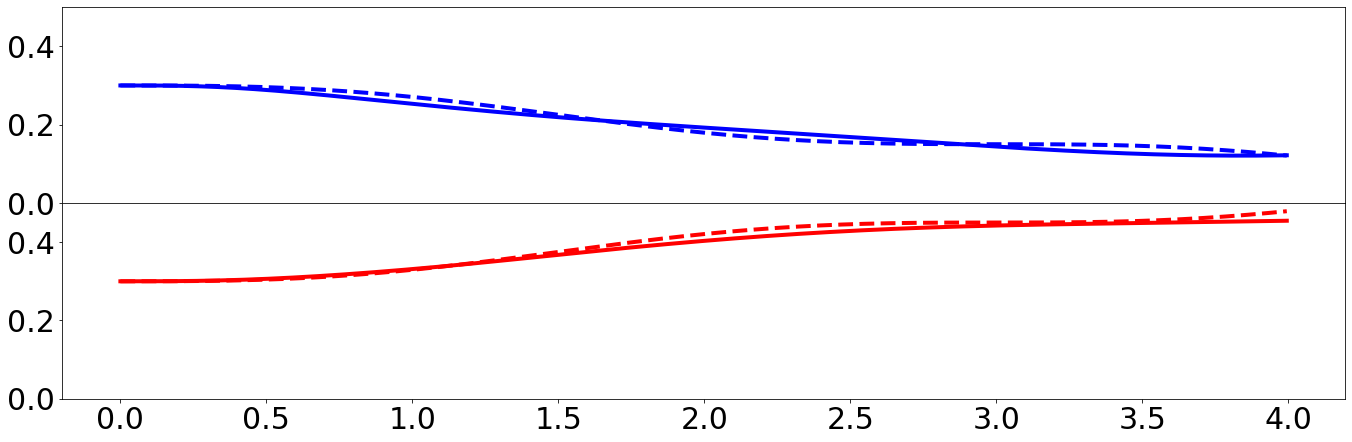

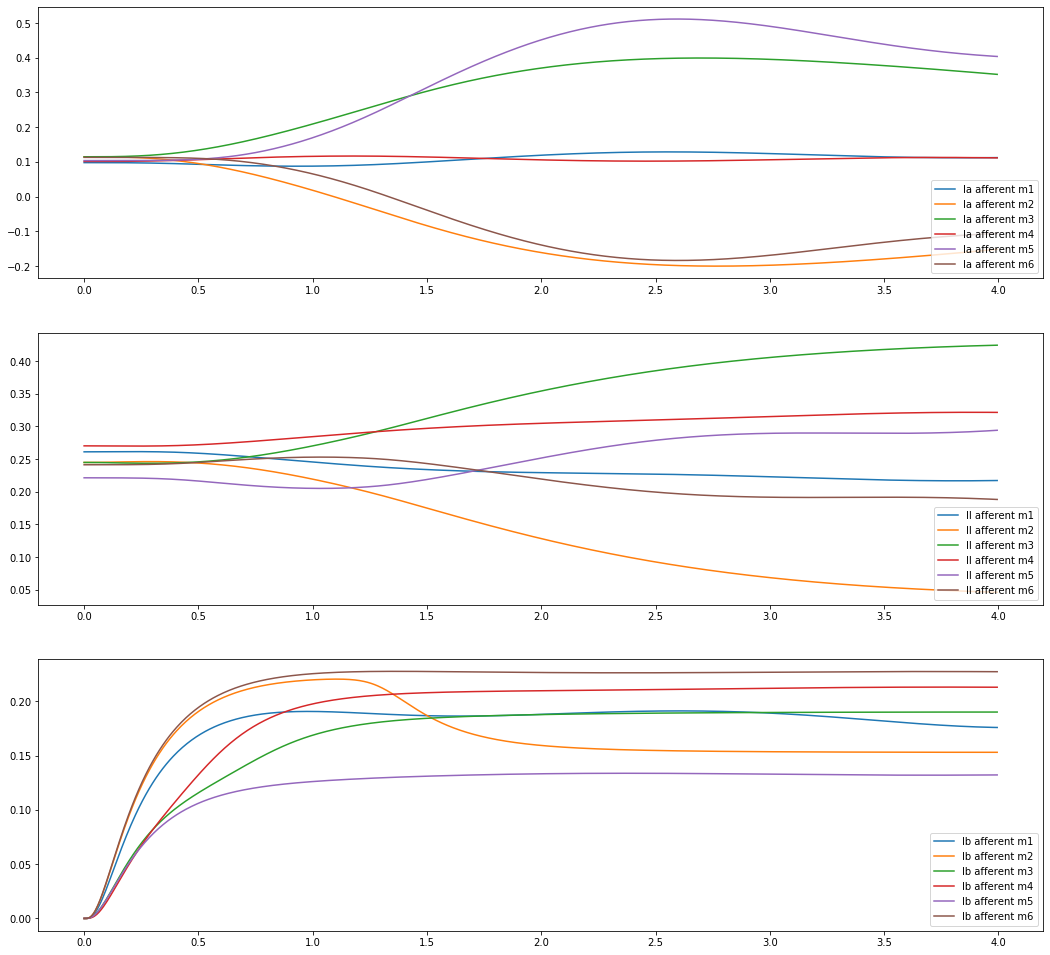

[[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1088892073321404, 1.1708697153172167, 1.045860810894677, 1.0436255076948597, 1.0738739462829852, 0.9004051869655294, -1.1622398916770107], [-1.0, 1.5, -1.0, -0.5, 1.0, 1.0, -0.5, 1.5, 0.0, 2.1351350547174706, -2.152553753219344, 2.6188938967060835, 2.679601706991581, -2.1407748494360623, -1.3372512060543804, 1.615349

In [6]:
w = sc.grad_desc()
#print(w)

In [11]:
# Synapse weights for 4 iterations: [1.0, 1.0, 0.5, 0.5]

# (0.15,0.45)
#Iteration 1
#w = [[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -1.1622398916770107], [-1.0, 3.0, -1.0, -1.0, 3.0, 2.0, -1.0, 3.0, 1.0, 1.1351350547174703, -0.15255375321934372, 1.1188938967060833, 1.1796017069915812, -0.14077484943606247, 0.16274879394561953, 1.115349330181512, 0.10736233653214483, 0.03939859321099051, -1.0037987958821297], [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 0.9768582470168059, -0.9107847920680969, 0.966647299779996, 0.89072415817823, 0.9816909363673738, 0.13917750129811174, 1.0405795487024914], [3.0, 3.0, 3.0, 1.174662379585714, 1.1824144738291922, 0.9568377262635913, 1.143109817793905], [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -1.0322685639185025], [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 2.0, -1.0, 1.0047829728710416, -0.18286755753249107, 1.1225184615239185, -0.10312053403482349, 1.1392844387905734, 0.07823594326208005, 0.944530745880461, 0.0022805758184336056, 0.917668968965553, 1.0640338279798918, 0.013654140641639195, 0.8779264242739213, -1.1472959614818588], [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529], [1.0, 1.0, 1.0, -0.12017333302403843, 1.0, -0.5102438653051973, -0.8483328372520285, -0.8402306952334748, -1.173801727069962, 0.9396707860991443, -1.0064846877495386, 1.1028110469364787, -1.1026067972078948], [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9849428373532352, -1.0398320716177982, -1.1079396809355757, -1.061999799905359, -1.065795150633378, -1.0943300862795884, -0.8892361137661806, -0.8826331008790751, -1.0804623435688239], [-1.0, -1.0, 3.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.03354591966834111, 1.0491727879677535], [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -1.1386834974775626, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 1.0983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -0.08971340374189994], [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 0.17490195265873015, -1.0273080496544464, -0.9508702000358867, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.8936313993682629, 1.0133622913442795, 1.1869016967423869, 1.0625570764145438, 1.1946783537163506, 0.1506487693752137, 1.0963896259404093], [-1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0016592199893637, 1.1424804052554314, -1.0675076877805296, 0.8906280792603629, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -1.0264034916365334], [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, 0.9975158925396113, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751], [2.0, 2.0, 2.0, 0.09486501131200953, -0.009611386985856202, -0.04902458883244548, -0.08857752939243176], [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, -0.41276955390223913, -1.0, 0.19959811271485872, 1.0, -1.0, -0.17549794094818738, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 0.07986235687947951], [-1.0, 1.0, -3.0, 1.0, -3.0, 1.0, -3.0, -3.0, 1.0, -3.0, -3.0, 1.0, -0.9015012693932637, -1.0014315863043342, -0.923588366567365, -0.9113061211932749, -1.13068629232945, -1.1245910633521503, -1.0723387390364125, -0.9425641866041556, -1.0591941786574488, 0.005892998126817484, 0.05902133448936586, -0.9722201900377173, 0.03572139821834802], [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0298633255087544, -0.8474656173105753, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [3.0, 2.0, 0.911141331298305, 2.0, 0.8861789062132357, 2.0, -0.033006712817969686, 0.11816157437302743, 0.13183067666171794, -0.013810300505924078, -0.07772078096198487, 0.19046872638051077, -0.09106627291137759], [-1.0, -1.0, 3.0, 3.0, -1.0, -2.0, 1.0, 1.0, 3.0, 1.0, -2.0, 1.0, -2.0, -2.0, 1.0, 1.0, -0.9690222787007161, -0.6338128674265029, -2.0, 1.7780283911173442, 2.0, -2.0, 1.7149654801655982, 1.0, 1.0, -0.6299127464859344, 0.4518771605762635, -3.0, -2.5562255535388942, 3.0, -3.0, -1.0671615786499182, 1.0, 1.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.8262698960276869, 1.0951016070985713, 1.107344864833042, 1.140808424276396, 0.9037690896804293, 0.9378711649523268, 0.8970551066605787, 0.07195458054188147, 1.1874500932652616], [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 2.0, -1.0, -1.0, 2.0, 1.0442560854270846, 0.8414636623546127, 0.03385915839315187, 0.19488514077762548, 1.166254474436637, -0.14810229768484195, 0.8345472733379895, 0.9271177977626888, -0.1952109005534342, 1.0248987521150206, 1.139846445668739, -0.10801866734895237, -0.9198001029069299], [-1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [1.0, 1.0, -1.134466962960195, 2.0, -1.4469436436793255, 2.0, -0.04782619873510843, 0.18999077344393583, -0.05598504586074804, -0.0008997390737044975, -0.03233264259643054, -0.10732439344025663, 0.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 2
#w = [[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.045860810894677084, 0.04362550769485973, 0.07387394628298527, -0.0995948130344706, -1.1622398916770107], [-1.0, 2.0, -1.0, -1.0, 2.0, 1.0, -1.0, 2.0, 0.0, 2.1351350547174706, -1.1525537532193437, 2.1188938967060835, 2.179601706991581, -1.1407748494360626, -0.8372512060543804, 2.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297], [3.0, -2.0, 3.0, 3.0, 3.0, 3.0, 0.9768582470168059, 0.08921520793190307, 0.966647299779996, 0.89072415817823, 0.9816909363673738, 0.13917750129811174, 0.040579548702491364], [3.0, 3.0, 3.0, 1.174662379585714, 1.1824144738291922, 0.9568377262635913, 1.143109817793905], [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 0.05941355970818529, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -1.0411809849798448, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023], [-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0, 1.0, -1.0, 2.0047829728710416, -1.1828675575324912, 2.1225184615239185, -1.1031205340348236, 2.1392844387905736, -0.92176405673792, 1.944530745880461, -0.9977194241815663, 1.917668968965553, 2.064033827979892, -0.9863458593583608, 1.8779264242739213, -2.1472959614818588], [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 1.827242726547853], [0.0, 0.0, 0.0, -0.12017333302403843, 0.0, -0.5102438653051973, -1.8483328372520285, -1.8402306952334748, -2.173801727069962, 1.9396707860991445, -2.0064846877495386, 2.1028110469364787, -2.102606797207895], [-1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 2.0, 3.0, 1.0, 1.0, -1.0, 1.0, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -1.0, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 1.0517081286674077, 0.9155308841280585, 0.19808608396463073, -0.03275931838893262, 1.1940400320819404, 1.1049791486415517, 0.8222099440312572, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.9849428373532352, -1.0398320716177982, -1.1079396809355757, -1.061999799905359, -1.065795150633378, -1.0943300862795884, -0.8892361137661806, -0.8826331008790751, -0.08046234356882387], [-1.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -0.845108752369458, -1.1546036144462242, 1.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.03354591966834111, 2.0491727879677537], [-2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.1386834974775626, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 1.0983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -0.08971340374189994], [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, -3.0, -3.0, 2.0, 2.0, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.10604317463073965, 0.16720986496267431, -0.19742285956117844, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, -0.027308049654446442, 0.04912979996411326, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.1027960834411803, -1.0173429449096223, 0.9049191561181354, 1.1431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.10636860063173714, 0.013362291344279464, 0.18690169674238688, 0.06255707641454378, 0.19467835371635056, -0.8493512306247863, 1.0963896259404093], [-2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 2.0016592199893637, 2.1424804052554314, -2.0675076877805294, 1.890628079260363, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -2.0264034916365334], [-2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.07324899607264745, 0.136232866224695, 0.05699221383432507, -0.0024841074603887403, -1.0158459285667423, -0.9720747612460625, 0.9167197665136751], [1.0, 1.0, 1.0, -0.9051349886879905, -1.0096113869858563, -1.0490245888324454, -0.08857752939243176], [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, 0.26698208986846783, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, 0.19959811271485872, 1.0, 0.0, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.153854960042208, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.9201376431205205], [0.0, 0.0, -4.0, 0.0, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, 0.0, 0.0984987306067363, -0.0014315863043341537, -1.923588366567365, 0.08869387880672508, -2.1306862923294503, -0.12459106335215031, -2.0723387390364127, -1.9425641866041556, -0.059194178657448804, -0.9941070018731826, 0.05902133448936586, 0.027779809962282687, 0.03572139821834802], [4.0, -4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0298633255087544, -1.8474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [4.0, 3.0, 1.911141331298305, 3.0, 1.8861789062132357, 3.0, 0.9669932871820304, 1.1181615743730275, 1.1318306766617179, 0.986189699494076, 0.9222792190380151, 1.1904687263805107, 0.9089337270886224], [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 0.03097772129928389, 0.3661871325734971, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231314, 0.0951016070985713, 0.10734486483304195, 0.14080842427639606, -0.09623091031957065, -0.06212883504767319, -0.10294489333942125, -0.9280454194581185, 0.18745009326526163], [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 2.044256085427085, 1.8414636623546126, -0.9661408416068481, -0.8051148592223745, 2.166254474436637, -1.1481022976848418, 1.8345472733379895, 1.9271177977626888, -1.1952109005534342, 0.024898752115020573, 1.139846445668739, -1.1080186673489523, -1.91980010290693], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.09965542364504, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [2.0, 2.0, -2.134466962960195, 3.0, -2.4469436436793255, 3.0, -0.04782619873510843, 0.18999077344393583, -1.055985045860748, -0.0008997390737044975, -1.0323326425964305, -0.10732439344025663, 1.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 3
#w = [[3.5, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.5, -3.0, -3.0, 3.0, 1.5, 3.5, 3.5, -3.0, 3.5, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6088892073321405, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, 0.5738739462829853, 0.4004051869655294, -1.1622398916770107], [-1.5, 1.5, -1.0, -1.0, 1.5, 1.0, -0.5, 2.0, 0.0, 1.6351350547174706, -1.6525537532193437, 2.1188938967060835, 2.179601706991581, -1.6407748494360626, -0.8372512060543804, 2.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.5037987958821297], [3.0, -1.5, 3.0, 3.0, 3.0, 3.0, 0.9768582470168059, 0.5892152079319031, 0.966647299779996, 0.89072415817823, 0.9816909363673738, 0.13917750129811174, 0.040579548702491364], [2.5, 2.5, 2.5, 0.6746623795857141, 0.6824144738291922, 0.4568377262635913, 0.643109817793905], [2.5, -3.0, -3.0, 2.5, 3.5, -3.0, -3.0, 2.5, 2.5, 2.5, -3.0, 2.5, -3.0, -3.0, 2.5, 3.5, 2.5, -3.0, 1.3371200427756724, 2.5, 3.5, 1.3253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 2.5, -3.0, 2.3750446706415755, 2.5, 3.5, 1.3112507817961032, 0.5471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.5322685639185023], [-1.5, -0.5, -1.5, -0.5, -1.5, -0.5, -1.5, -0.5, -1.5, -1.5, 1.5, -1.5, 1.5047829728710416, -1.6828675575324912, 1.6225184615239185, -1.6031205340348236, 2.1392844387905736, -0.92176405673792, 1.944530745880461, -0.9977194241815663, 1.917668968965553, 2.064033827979892, -0.48634585935836083, 1.3779264242739213, -1.6472959614818588], [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 1.327242726547853], [-0.5, -0.5, -0.5, 0.37982666697596157, -0.5, -1.0102438653051973, -2.3483328372520287, -2.340230695233475, -2.673801727069962, 2.4396707860991445, -2.5064846877495386, 1.6028110469364787, -1.602606797207895], [-0.5, -0.5, 1.0, 1.0, -0.5, 0.0, 2.0, 3.0, 1.0, 1.0, -0.5, 1.0, 0.0, -1.5, 1.0, 3.0, 1.0, -0.5, -0.32704242043431453, 1.5, 3.0, -0.3185440755241489, 0.14378352226755986, -0.5, 0.03730154725216783, 1.0, -0.5, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -0.5, 0.3456844217230248, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -2.484942837353235, -1.5398320716177982, -1.6079396809355757, -1.561999799905359, -1.065795150633378, -1.0943300862795884, -0.8892361137661806, -0.8826331008790751, -0.5804623435688239], [-1.5, -0.5, 3.5, 0.5, -0.5, 2.5, -0.5, 2.5, -0.5, -0.5, 2.5, -1.5, -0.34510875236945804, -0.6546036144462242, 1.3357711942458048, 0.3300825339314496, -0.46453194725307556, 0.6627842153710266, -0.5671218383881333, 0.5829756725808823, -0.4327493561324719, -0.5295028538314182, 0.31391200892114535, 0.5335459196683411, 1.5491727879677537], [-1.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.3613165025224374, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 1.0983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -0.08971340374189994], [1.5, 1.5, 1.5, -0.07757993049566014, 1.5, -0.2303238550374873, -0.49328164122697915, -0.5790058904073057, -0.5849765857087106, 0.6172163576388046, -0.6814014890295628, 0.48620896096363714, -0.6800404062509589], [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5, 1.5, 3.0, -2.5, -2.5, 2.0, 1.5, 3.5, 4.0, -2.5, 3.0, -2.5, -2.5, 2.0, 2.0, 2.0, 3.5, -2.5, 0.6840194180209143, 0.4151691733559906, 0.14620721145433824, -0.10604317463073965, 0.6672098649626743, 0.30257714043882156, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, 0.47269195034555356, 0.5491297999641133, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.6027960834411803, -1.0173429449096223, 1.4049191561181353, 1.6431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178], [2.5, 2.5, 2.5, 2.5, 1.5, 2.5, -0.10636860063173714, 0.013362291344279464, 0.18690169674238688, 0.06255707641454378, 0.19467835371635056, -0.8493512306247863, 1.0963896259404093], [-2.5, -1.5, 1.5, -1.5, 1.5, 1.5, -1.5, 1.5, 1.5, 1.5016592199893637, 1.6424804052554314, -1.5675076877805294, 1.390628079260363, -0.5636347281847505, -0.5789520220150635, 0.6887473331264218, -0.6978700002755511, -0.5962700906038572, -1.5264034916365334], [-1.5, 3.5, 3.5, 3.5, 3.5, 3.5, 0.5732489960726475, -0.363767133775305, -0.44300778616567493, -0.0024841074603887403, -1.0158459285667423, -0.9720747612460625, 0.9167197665136751], [0.5, 0.5, 0.5, -1.4051349886879905, -1.5096113869858563, -1.5490245888324454, -0.5885775293924318], [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, 0.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [4.5, 4.0, 4.5, 4.0, 4.0, 4.0, 2.0, 4.0, 2.153854960042208, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.4201376431205205], [-0.5, 0.0, -4.0, -0.5, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, -0.5, 0.0984987306067363, -0.5014315863043342, -2.423588366567365, 0.08869387880672508, -2.1306862923294503, -0.6245910633521503, -1.5723387390364127, -1.9425641866041556, -0.5591941786574488, -1.4941070018731826, 0.05902133448936586, 0.027779809962282687, 0.03572139821834802], [3.5, -3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 0.5298633255087544, -2.3474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [3.5, 2.5, 1.411141331298305, 2.5, 1.3861789062132357, 2.5, 0.46699328718203037, 0.6181615743730275, 0.6318306766617179, 0.486189699494076, 0.42227921903801513, 0.6904687263805107, 0.4089337270886224], [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 2.0, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.6737301039723131, -0.4048983929014287, -0.39265513516695805, -0.35919157572360394, -0.5962309103195707, -0.5621288350476732, -0.6029448933394213, -1.4280454194581185, -0.31254990673473837], [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.5, -1.5, -1.0, 0.5, 2.044256085427085, 1.8414636623546126, -1.466140841606848, -1.3051148592223745, 2.666254474436637, -1.6481022976848418, 1.8345472733379895, 1.9271177977626888, -1.6952109005534342, 0.5248987521150206, 1.639846445668739, -1.6080186673489523, -2.41980010290693], [0.0, -0.5, 0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -1.59965542364504, 0.6436041412907356, 0.15230458371466105, 0.6546564579368124, 0.5393273087908257, 0.575322328883722, 0.03057853490178139, 0.1847968935382669, -0.3545214184542865], [1.5, 1.5, -1.634466962960195, 2.5, -1.9469436436793255, 2.5, -0.5478261987351084, -0.31000922655606417, -0.555985045860748, -0.5008997390737044, -0.5323326425964305, -0.6073243934402566, 1.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 4
#w = [[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.5, 2.0, -3.0, -3.0, 3.0, 1.5, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.5, 3.5, -3.0, -0.1808233961108603, -1.0444251884085287, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, 0.053189664707266715, -0.07032799290797453, 0.16895061296189118, -1.1051094245353301, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, -0.8618555019229022, 0.16957285161727964, -0.11166528326705386, -1.8267784495816788, -0.004400502570595932, -1.0101125439388066, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1088892073321404, 1.1708697153172167, 1.045860810894677, 1.0436255076948597, 1.0738739462829852, 0.9004051869655294, -1.1622398916770107], [-1.0, 1.5, -1.0, -0.5, 1.0, 1.0, -0.5, 1.5, 0.0, 2.1351350547174706, -2.152553753219344, 2.6188938967060835, 2.679601706991581, -2.1407748494360623, -1.3372512060543804, 1.615349330181512, -0.3926376634678552, -0.9606014067890095, -3.0037987958821297], [3.0, -1.0, 3.0, 3.0, 3.0, 3.0, 0.9768582470168059, 1.089215207931903, 0.966647299779996, 0.89072415817823, 0.9816909363673738, 0.13917750129811174, 0.040579548702491364], [2.0, 2.0, 2.0, 0.17466237958571407, 0.6824144738291922, 0.4568377262635913, 0.643109817793905], [2.0, -3.0, -3.0, 2.0, 4.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 4.0, 2.0, -3.0, 0.8371200427756724, 2.5, 4.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.2907940856230207, 3.0, -3.0, 2.8750446706415755, 2.5, 4.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 0.583329868397066, -1.1481936661473469, -1.0584814458520746, 0.46170860773873335, -0.4405864402918147, -1.186771611831765, -0.9847962547242608, 0.3526852474151063, -0.4916260264251418, -0.6590060859205511, -1.1368078498324763, -0.3319881415943085, -0.8863080899493665, -1.0411809849798448, -0.6381412674052964, -0.4115227008321618, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.0322685639185023], [-1.0, -1.0, -1.5, -0.5, -1.5, -1.0, -1.5, -1.0, -1.0, -1.5, 2.0, -1.0, 1.5047829728710416, -1.6828675575324912, 1.6225184615239185, -1.6031205340348236, 2.1392844387905736, -0.92176405673792, 1.944530745880461, -0.9977194241815663, 1.917668968965553, 2.064033827979892, 0.013654140641639168, 1.3779264242739213, -1.1472959614818588], [3.0, -4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -1.808788442153212, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.827242726547853], [0.0, 0.0, 0.0, -0.12017333302403843, 0.0, -0.5102438653051973, -2.8483328372520287, -2.840230695233475, -3.173801727069962, 2.9396707860991445, -3.0064846877495386, 2.1028110469364787, -2.102606797207895], [-0.5, -0.5, 0.5, 0.5, -0.5, 0.0, 1.5, 3.0, 1.0, 1.5, -1.0, 0.5, 0.0, -2.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.5, 3.0, -0.8185440755241489, 0.14378352226755986, -1.0, 0.03730154725216783, 0.5, -1.0, 0.3916705547275723, 1.0, 3.0, -0.36773649885179394, 0.39158904046991827, -1.0, -0.15431557827697517, 0.8227106208472481, 0.8916049073441012, 0.5517081286674077, 0.4155308841280585, 0.19808608396463073, -0.5327593183889326, 0.6940400320819404, 0.6049791486415517, 0.32220994403125724, -0.5729188593765748, 0.18710485269103144, -0.676080499766285, -0.696793075222559, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.6196497960288464, 0.08421724194750918, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -2.484942837353235, -1.5398320716177982, -1.6079396809355757, -1.561999799905359, -1.065795150633378, -1.0943300862795884, -0.8892361137661806, -0.8826331008790751, -1.0804623435688239], [-2.0, -1.0, 4.0, 1.0, -1.0, 3.0, -1.0, 3.0, -1.0, -1.0, 3.0, -2.0, -0.845108752369458, -1.1546036144462242, 1.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, 0.033545919668341084, 1.5491727879677537], [-1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.3613165025224374, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 1.0983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -0.08971340374189994], [2.0, 2.0, 2.0, 0.42242006950433986, 2.0, 0.2696761449625127, 0.006718358773020849, -0.5790058904073057, -0.5849765857087106, 0.6172163576388046, -0.6814014890295628, 0.48620896096363714, -0.6800404062509589], [-3.0, -3.0, 2.5, 2.5, -3.0, -3.0, 1.5, 1.5, 3.0, -3.0, -3.0, 2.0, 1.5, 3.0, 4.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 1.5, 3.0, -3.0, 0.18401941802091426, -0.08483082664400943, 0.14620721145433824, -0.10604317463073965, 0.16720986496267431, -0.19742285956117844, 0.0005263000573993981, 0.18599235606528786, -0.8250980473412699, 0.47269195034555356, 0.5491297999641133, -1.9196532843053769, -1.1339018426875853, -0.8284919403343982, -0.9966566017322416, 1.6027960834411803, -1.0173429449096223, 1.4049191561181353, 1.6431410741645687, -1.0205073584638849, -0.8556773407608492, -1.1383426332622781, -1.1001011643584426, 0.9158255584524178], [2.0, 2.0, 2.5, 2.5, 1.5, 2.5, -0.10636860063173714, 0.013362291344279464, 0.18690169674238688, 0.06255707641454378, 0.19467835371635056, -0.8493512306247863, 1.0963896259404093], [-2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 2.0016592199893637, 2.1424804052554314, -2.0675076877805294, 1.890628079260363, -1.0636347281847505, -1.0789520220150635, 1.1887473331264218, -1.1978700002755511, -1.0962700906038572, -2.0264034916365334], [-1.0, 3.5, 3.5, 3.5, 3.5, 3.5, 0.07324899607264745, 0.136232866224695, 0.05699221383432507, 0.49751589253961126, -0.5158459285667423, -0.4720747612460625, 1.4167197665136753], [0.0, 0.0, 0.0, -1.9051349886879905, -2.0096113869858563, -2.049024588832445, -0.5885775293924318], [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, 0.0, -0.23301791013153217, 1.0, -0.5, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, 0.0, -0.3004018872851413, 1.0, -0.5, 0.8245020590518126, 1.0, 1.0, -1.049878998519036, -1.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, -0.897132246902665, -1.0053794613141698, -0.9209114168723245, -0.8510570925992291, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [4.5, 4.0, 4.5, 4.0, 4.0, 4.0, 2.0, 4.0, 1.6538549600422079, 1.845075989937838, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, -0.4201376431205205], [-0.5, 0.0, -4.0, -0.5, -4.0, 0.0, -4.0, -4.0, 0.0, -4.0, -4.0, -0.5, 0.0984987306067363, -1.0014315863043342, -1.923588366567365, 0.08869387880672508, -2.1306862923294503, -1.1245910633521503, -2.0723387390364127, -1.9425641866041556, -1.0591941786574488, -1.4941070018731826, 0.05902133448936586, 0.027779809962282687, 0.03572139821834802], [4.0, -3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 0.5298633255087544, -1.8474656173105752, -1.1478784904066506, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [3.0, 2.0, 0.911141331298305, 2.0, 0.8861789062132357, 2.0, -0.03300671281796963, 0.11816157437302754, 0.13183067666171788, -0.013810300505924022, -0.07772078096198487, 0.1904687263805107, -0.09106627291137759], [-2.0, 0.0, 4.0, 4.0, 0.0, -3.0, 1.5, 2.0, 4.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, -0.1338128674265029, -3.0, 2.7780283911173442, 3.0, -3.0, 2.7149654801655982, 1.5, 2.0, 0.3700872535140656, -0.5481228394237365, -4.0, -3.5562255535388942, 4.0, -4.0, -2.0671615786499182, 2.0, 2.0, -1.1015138358665681, 1.0252104668303734, 1.1983252320898046, 1.0718527707680983, 1.1638802901600158, -1.117881265164104, 0.8693330705505045, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, -0.8737339649219444, -1.1922793923236, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.892655135166958, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -1.9280454194581185, -0.8125499067347384], [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.5, -1.5, -1.0, 0.5, 2.044256085427085, 1.8414636623546126, -1.466140841606848, -1.3051148592223745, 2.666254474436637, -1.6481022976848418, 1.8345472733379895, 1.9271177977626888, -1.6952109005534342, 0.5248987521150206, 1.639846445668739, -1.6080186673489523, -2.91980010290693], [0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.59965542364504, 0.6436041412907356, 0.15230458371466105, 0.6546564579368124, 0.5393273087908257, 0.575322328883722, 0.03057853490178139, 0.1847968935382669, -0.8545214184542864], [1.0, 1.0, -1.134466962960195, 2.0, -1.4469436436793255, 2.0, -1.0478261987351085, -0.8100092265560641, -0.05598504586074804, -1.0008997390737044, -0.03233264259643054, -1.1073243934402566, 0.6468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


Error: 0.2153424992088743


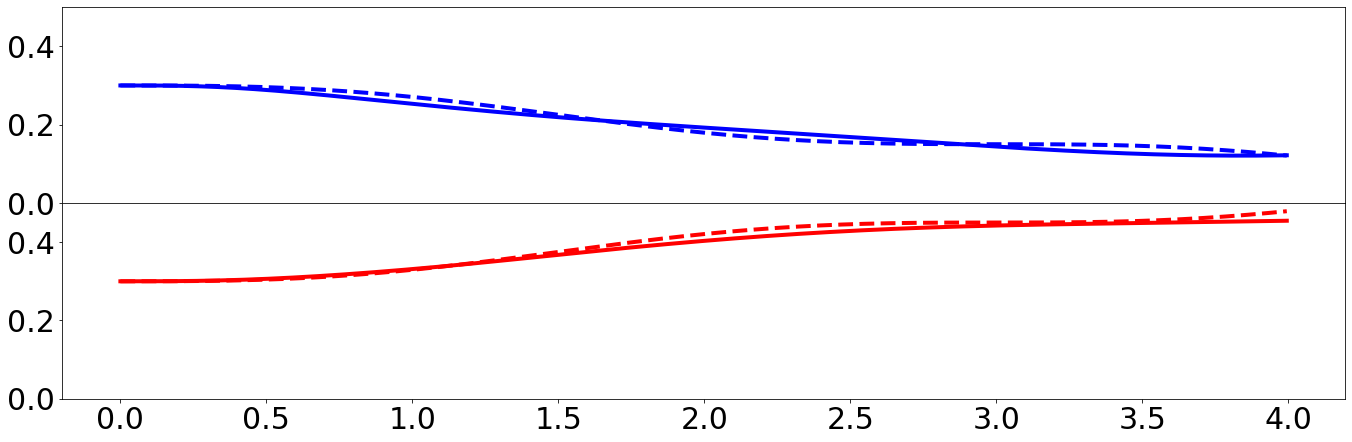

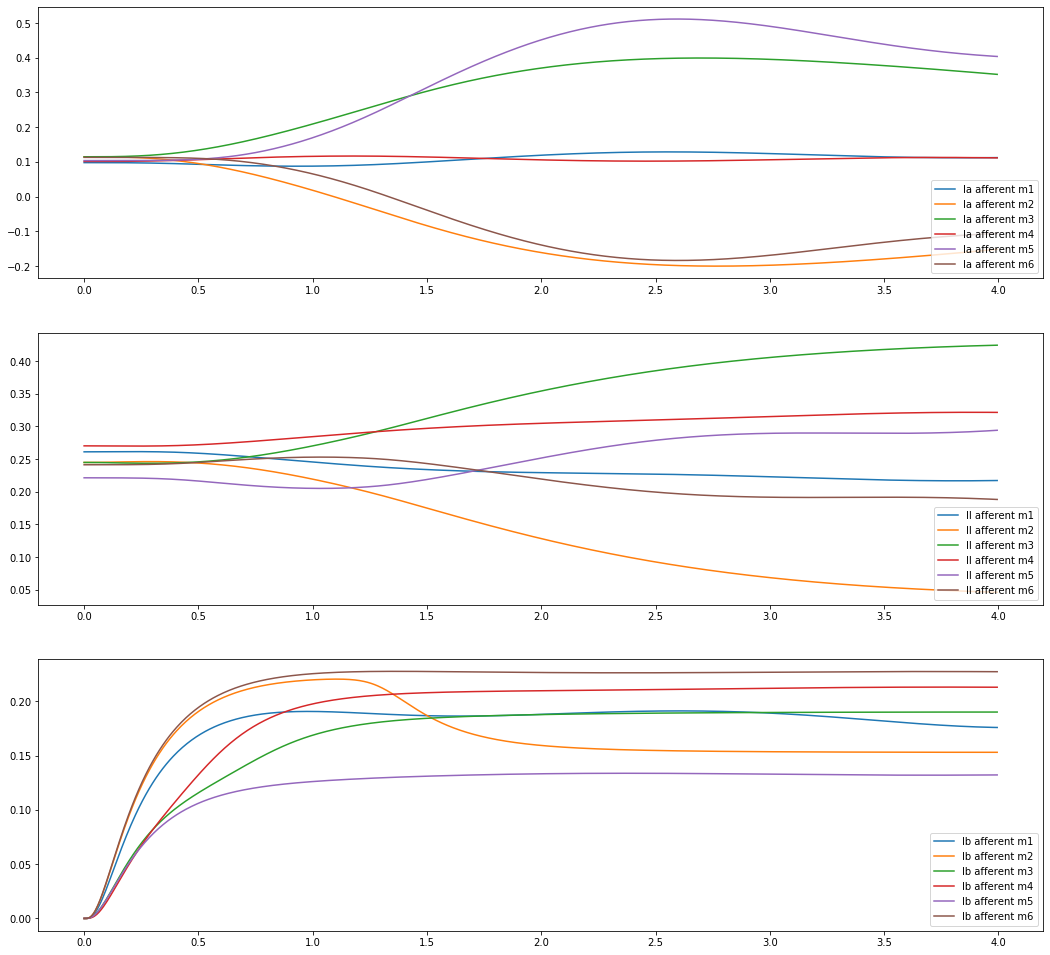

In [7]:
sc.initialize()
sc.update_w(w)
sc.simulate(4.)
error = sc.calc_error(0.15,0.45,4.)
print('Error: ' + str(error))
sc.arm_trajectory(0.15,0.45,4.)
sc.arm_afferent_output()

In [ ]:
w = sc.w_list()
print(w)

In [ ]:
syn_idx = sc.syn_list()
print(syn_idx)

In [ ]:
for slist in sc.net.syns:
    for syn in slist:
        pre_type = sc.net.units[syn.preID].type.name
        post_type = sc.net.units[syn.postID].type.name
        print("%s (%d) --> %s (%d), port:%d" %(pre_type, syn.preID, post_type, syn.postID, syn.port))